**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 7 - Lineárne systémy II. </font>** 

<a id=table_of_contents></a>
##  Obsah 

* [Úvod](#uvod) 


* [Klasické iteračné metódy](#klasicke) 


* [Ďalšie iteračné metódy](#dalsie) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.**

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod</font> 

Mnoho praktických problémov vyžaduje riešenie rozsiahlych SLR, ktorých matice sústav sú riedke, t.j. majú relatívne málo nenulových prvkov. Štandardné eliminačné metódy študované v téme 6 nie sú pre taký prípad celkom vhodné, keďže v priebehu eliminácie dochádza postupne k zaplňovaniu pôvodne nulových pozícií v matici sústavy, čo vedie k veľkým nárokom na počet aritmetických operácií a kladie to i vysoké nároky na pamäť počítača. 

To je dôvod, prečo sa na riešenie uvedených SLR používajú **_iteračné metódy_**. Princíp je nasledovný: zvolí sa počiatočný vektor $\mathbf{x}_0$ a generuje sa postupnosť vektorov $\mathbf{x}_0,\mathbf{x}_1,\mathbf{x}_2,\ldots$, ktorá konverguje k hľadanému riešeniu $\mathbf{x}^*$. Spoločnou črtou štandardných iteračných metód je fakt, že každá jedna iterácia (resp. krok) od $\mathbf{x}_k$ ku $\mathbf{x}_{k+1}$ vyžaduje objem výpočtov porovnateľný s násobením matice $\mathbf{A}$ vektorom, čo je pre riedke matice objem neveľký (pokiaľ je v každom riadku matice $\mathbf{A}$ rádu $n$ nanajvýš $m$ nenulových prvkov, ide o $nm$ operácií násobenia a sčítania). Prijateľný objem výpočtov je teda možné dosiahnúť aj pre pomerne veľký počet iterácií. 

Na obhajobu priamych metód je však potrebné dodať, že pre sústavy s riedkymi maticami existujú i veľmi efektívne špecializované algoritmy eliminačného charakteru. Napriek tomu, pre extrémne rozsiahle SLR so špeciálnou štruktúrou matice sústavy, sú vhodne zvolené iteračné metódy efektívnejšie a častokrát sú jedinou prakticky realizovateľnou metódou riešenia. 

***
<a id=klasicke></a>
 # <font color=brown> Klasické iteračné metódy </font> 

Tieto metódy vychádzajú z rozkladu matice sústavy $\mathbf{A}=\mathbf{M}-\mathbf{N}$, kde $\mathbf{M}$ je regulárna matica. Postupnosť $\{x_k\}$ je potom definovaná predpisom 

\begin{align*}\label{eq:IterEq1} \tag{1}
\mathbf{M}\mathbf{x}_{k+1}=\mathbf{N}\mathbf{x_k}+\mathbf{b},
\end{align*} 

pričom počiatočná aproximácia $\mathbf{x}_0$ je daná. Matica $\mathbf{M}$ definujúca konkrétnu metódu sa volí tak, aby riešenie SLR \eqref{eq:IterEq1} "nebolo príliš nákladné" a pritom konvergencia $\mathbf{x}_k\to\mathbf{x}^*$ bola "rýchla". 


## Konvergencia 

Metódu $(1)$ je možné ekvivalentne zapísať v tvare 

\begin{align*}\label{eq:IterEq2} \tag{2}
\mathbf{x}_{k+1}=\mathbf{T}\mathbf{x_k}+\mathbf{c},
\end{align*}

kde $\mathbf{T}=\mathbf{M}^{-1}\mathbf{N}$, $\mathbf{c}=\mathbf{M}^{-1}\mathbf{b}$. Metóda \eqref{eq:IterEq2} je známa ako **_metóda prostej iterácie_**. Ak $\mathbf{x}^*=\mathbf{A}^{-1}\mathbf{b}$ je presné riešenie, potom $\mathbf{e}_k=\mathbf{x}_k-\mathbf{x}^*$ je chyba v $k$-tom kroku metódy. **_Konvergencia $\mathbf{x}_k\to\mathbf{x}^*$ metódy_** \eqref{eq:IterEq2} nastane práve vtedy, keď $\mathbf{e}_k\to\mathbf{0}$. Odčítaním rovnice $\mathbf{x}^*=\mathbf{T}\mathbf{x}^*+\mathbf{c}$ od rovnice \eqref{eq:IterEq2} dostaneme 

\begin{align*}\label{eq:IterErr1} \tag{3}
\mathbf{e}_{k+1}=\mathbf{T}\mathbf{e_k}=\mathbf{T}^2\mathbf{e_k-1}=\ldots=\mathbf{T}^{k+1}\mathbf{e_0}.
\end{align*} 

Preto 

\begin{align*}\label{eq:IterErr2} \tag{4}
\mathbf{e}_{k}\to\mathbf{0} \Longleftrightarrow \mathbf{T}^{k}\to\mathbf{O}.
\end{align*}

Matica $\mathbf{A}$ s vlastnosťou $\mathbf{A}^k\to\mathbf{O}$ pre $k\to\infty$ sa nazýva **_konvergentná matica_** (ang. *convergent matrix*). **_Konvergenciu postupnosti matíc_** $\left\{\mathbf{A}_k\right\}_{k=1}^{\infty}$ k matici $\mathbf{A}$ chápeme tak, že $\mathbf{A}_k\to\mathbf{A}$ pre $k\to\infty$ práve vtedy, keď $\lVert\mathbf{A}_k-\mathbf{A}\rVert\to0$ pre $k\to\infty$ a pre nejakú maticovú normu $\lVert\cdot\rVert$. **Nutnú a postačujúcu podmienku pre to, aby matica $\mathbf{A}$ bola konvergentná odvodíme pomocou *Jordanovho rozkladu matice* $\mathbf{A}$.** 


Ku každej štvorcovej matici $\mathbf{A}$ existuje regulárna matica $\mathbf{X}$ taká, že $\mathbf{X}^{-1}\mathbf{A}\mathbf{X}=\mathbf{J}$, kde 

$$\mathbf{J}=\begin{pmatrix}\mathbf{J}_1 &  & & \\ & \mathbf{J}_2 &  & \\ & & \ddots & \\ & & & \mathbf{J}_t\end{pmatrix}$$ 

je blokovo diagonálna matica, známa ako **_Jordanov kanonický tvar matice_** $\mathbf{A}$, kde 

$$\mathbf{J}_i=\begin{pmatrix}\lambda_i & 1 & & \\ & \lambda_i & \ddots & \\ & & \ddots & 1\\ & & & \lambda_i\end{pmatrix}, \quad i=1,2,\ldots, t$$ 

sú **_Jordanove bloky_**. Mimo hlavnej diagonály a prvej naddiagonály sú prvky matíc $\mathbf{J}_i$ nulové. Dôkaz existencie rozkladu tu nebudeme uvádzať, keďže ide o tému, ktorá je náplňou jedného zo základných kurzov lineárnej algebry. 

Keďže horná trojuholníková matica $\mathbf{A}$ je [podobná](https://cs.wikipedia.org/wiki/Podobnost_matic) s maticou $\mathbf{T}$, tak diagonálne prvky $\lambda_i$ Jordanovych blokov $\mathbf{J}_i$ sú vlastné čísla matice $\mathbf{A}$. 

--- 

### <font color=green> Veta 1 (O konvergentnej matici) </font> 

Matica $\mathbf{A}$ je konvergentná vtedy a len vtedy, keď spektrálny polomer $\varrho(\mathbf{A})$ matice $\mathbf{A}$ je menší než $1$, t.j. 

\begin{align*}\label{eq:ConvergentMatrix1} \tag{5}
\mathbf{A}^{k}\to\mathbf{O} \text{ pre } k\to\infty \Longleftrightarrow \varrho(\mathbf{A})<1.
\end{align*}

--- 

--- 

#### Poznámka 1

* Veta 1 vlastne poskytuje nutnú i postačujúcu podmienku konvergencie matice: metóda prostej iterácie $(2)$ konverguje práve vtedy, keď $\varrho(\mathbf{T})<1$.


* Ak je $\mathbf{x}$ vlastný vektor matice $\mathbf{A}$, $\lambda$ je prislúchajúce vlastné číslo, tzn. platí $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$, potom <br/> 
<br/>
$$|\lambda|\lVert\mathbf{x}\rVert=\lVert\mathbf{A}\mathbf{x}\rVert\le\lVert\mathbf{A}\rVert\cdot\lVert\mathbf{x}\rVert$$
<br/>
odkiaľ <br/>
<br/>
$$\varrho(\mathbf{A})\le\lVert\mathbf{A}\rVert.$$
<br/> 
Môžeme teda vysloviť **postačujúcu podmienku konvergencie**: Ak je $\lVert\mathbf{T}\rVert<1$, tak metóda prostej iterácie $(2)$ konverguje. 


* Pre konkrétne iteračné metódy uvedené ďalej, vyslovíme postačujúce podmienky konvergencie v inej - ľahšie overiteľnej forme. 

---

<font color=orange> Pomocou Python-u nájdite príklad konvergentnej aj nekonvergentnej matice - obidva prípady ilustrujte numericky. Taktiež overte (ne)splnenie podmienky konvergencie. </font>

--- 

#### <font color=blue> Príklad 1 </font>   

Lineárny sytém $\mathbf{A}\mathbf{x}=\mathbf{b}$ daný rovnicami  

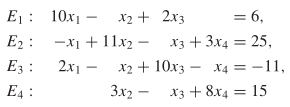 

má exaktné riešenie $\mathbf{x}^*=(1,2,-1,1)'$. Aby sme získali tvar $(2)$ uvedený vyššie, tak v každej z rovníc $E_i$, vyjadríme neznámu $x_i$, $i=1,2,3,4$, čím dostaneme 

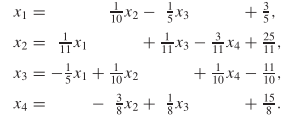 

Potom uvedená SLR môže byť prepísaná do tvaru $\mathbf{x}=\mathbf{T}\mathbf{x}+\mathbf{c}$, kde 

$$\mathbf{T}=\begin{pmatrix}0&1/10&-1/5&0\\1/11&0&1/11&-3/11\\-1/5&1/10&0&1/10\\0&-3/8&1/8&0\end{pmatrix}, \quad \mathbf{c}=\begin{pmatrix}3/5\\25/11\\-11/10\\15/8\end{pmatrix},$$

resp. do tvaru $\mathbf{x}=\varphi(\mathbf{x})$, kde $\varphi(\mathbf{x})=\mathbf{T}\mathbf{x}+\mathbf{c}$, čo pripomína metódu prostej iterácie z témy 5. 

Ak vezmeme počiatočnú aproximáciu $\mathbf{x}_0=(0,0,0,0)'$, tak $\mathbf{x}_1$ je dané nasledovne: 

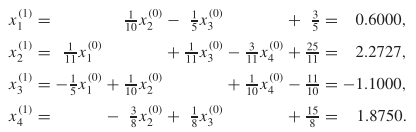 

Ďalšie iterácie $\mathbf{x}_k=\left(x_1^{(k)},x_2^{(k)},x_3^{(k)},x_4^{(k)}\right)'$ sa vygenerujú analogicky a sú uvedené v nasledujúcej tabuľke. 

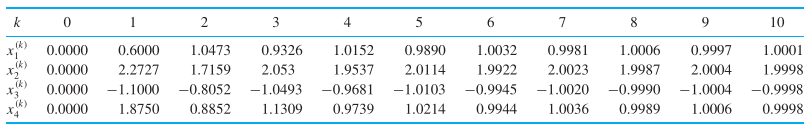 
$$\text{Zdroj: Burden & Faires (2011).}$$ 

Ako kritérium zastavenia bolo použité nasledovné: 

$$\dfrac{\lVert\mathbf{x}_{10}-\mathbf{x}_9\rVert_{\infty}}{\lVert\mathbf{x}_{10}\rVert_{\infty}}=\dfrac{8.0\times10^{-4}}{1.9998}<10^{-3}.$$

V skutočnosti totiž platí $\lVert\mathbf{x}_{10}-\mathbf{x}^*\rVert_{\infty}=0.0002$. 

Tento príklad v podstate ilustruje *Jacobiho metódu* popísanú nižšie.

---

<font color=orange> Overte, že presné rešenie lineárneho systému v Príklade 1 je $\mathbf{x}^*=(1,2,-1,1)'$ Vykonajte jednotlivé výpočty z tabuľky z Príkladu 1 v Python-e.  </font>

## Kritéria pre ukončenie iterácií 

Jedná sa o to, ako rozhodnúť, či $\mathbf{x}_{k+1}$ je už dostatočne dobrá aproximácia riešenia $\mathbf{x}^*$. Musíme sa zaobísť bez riešenia $\mathbf{x}^*$, keďže v skutočnosti ho nepoznáme. Môžeme napr. skúmať veľkosť zmeny $\mathbf{x}_{k+1}-\mathbf{x}_k$ alebo veľkosť rezidua $\mathbf{r}_{k+1}=\mathbf{b}-\mathbf{A}\mathbf{x}_{k+1}$. Postupuje sa tak, že užívateľ vopred zadá malé kladné číslo $\varepsilon$ ako požadovanú presnosť a v každom kroku metódy sa testuje, či je splnená niektorá z nasledujúcich podmienok: 

1. $\lVert\mathbf{x}_{k+1}-\mathbf{x}_k\rVert\le\varepsilon\lVert\mathbf{x}_k\rVert$;


2. $\lVert\mathbf{r}_{k+1}\rVert\le\varepsilon\left(\lVert\mathbf{A}\rVert\cdot\lVert\mathbf{x}_{k+1}\rVert+\lVert\mathbf{b}\rVert\right)$;


3. $\lVert\mathbf{r}_{k+1}\rVert\le\varepsilon\lVert\mathbf{r}_0\rVert$. 


Ak je zvolená konkrétna podmienka splnená, výpočet sa preruší a $\mathbf{x}_{k+1}$ sa považuje za približnú hodnotu riešenia $\mathbf{x}^*$. 

<font color=purple> EXTRA: Zvoľte napr. $\varepsilon=0.0005$ a v Python-e overte, či výpočet z Príkladu 1 skončí rovnakou iteráciou pre rôzne kritéria zastavenia (ukončenia iterácií). Za správne riešenie je možné získať dva bonusové body. </font>

## Jacobiho metóda 

Predpokladajme, že $\mathbf{A}=\mathbf{L}+\mathbf{D}+\mathbf{U}$, kde $\mathbf{D}$ je diagonálna matica, ktorá má rovnakú diagonálu ako $\mathbf{A}$, ďalej $\mathbf{L}$ resp. $\mathbf{U}$ je (rýdzo) dolná resp. (rýdzo) horná trojuholníková časť matice $\mathbf{A}$, t.j. 

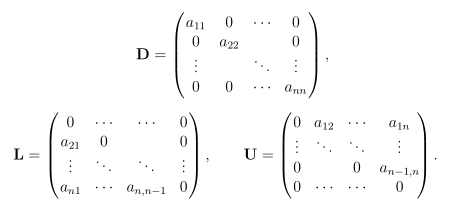 

Najjednoduchší rozklad matice $\mathbf{A}$ dostaneme pre $\mathbf{M}=\mathbf{D}$, $\mathbf{N}=-(L+U)$. Metóda $(2)$ má potom tvar 

\begin{align*}\label{eq:Jacobi1} \tag{6}
\mathbf{D}\mathbf{x}_{k+1}=\mathbf{b}-(\mathbf{L}+\mathbf{U})\mathbf{x}_k 
\end{align*}

a je známa ako **_Jacobiho metóda_**. Sústava \eqref{eq:Jacobi1} s diagonálnou maticou sa rieši jednoducho. Ak zapíšeme \eqref{eq:Jacobi1} po zložkách (zložky vektora $\mathbf{x}_k$ sú označené $x_i^{(k)}$, podobne pre $\mathbf{x}_{k+1}$), tak dostaneme 

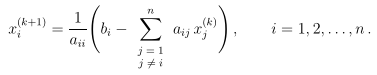 


--- 

#### Poznámka 2

Analýzou vlastností iteračnej matice $\mathbf{T}=-\mathbf{D}^{-1}(\mathbf{L}+\mathbf{U})$ sa dá ukázať, že **Jacobiho metóda konverguje vtedy, keď $\mathbf{A}$ je rýdzo (striktne) diagonálne dominantná**. 

---

## Gaussova - Seidelova metóda

Všimnime si, že Jacobiho metóda používa $\mathbf{x}_k$ k výpočtu všetkých zložiek $\mathbf{x}_{k+1}$. Keďže prvky vektora $\mathbf{x}_{k+1}$ sa počítajú postupne jeden po druhom (pri klasickom sériovom výpočte; kedysi ešte paralelizácia výpočtov nebola v móde), vznikol prirodzený nápad využiť ihneď tie zložky $\mathbf{x}_{k+1}$, ktoré sú už k dispozícii. Takto dostávame **_Gaussovu-Seidelovu metódu_**: 

$$x_i^{(k+1)}=\dfrac{1}{a_{ii}}\left(b_i-\displaystyle\sum\limits_{j=1}^{i-1}a_{ij}x_j^{(k+1)}-\displaystyle\sum\limits_{j=i+1}^{n}a_{ij}x_j^{(k)}\right), \quad i=1,2,\ldots,n.$$

V maticovom vyjadrení má táto metóda nasledovný tvar: 

\begin{align*}\label{eq:GaussSeidel1} \tag{7}
(\mathbf{D}+\mathbf{L})\mathbf{x}_{k+1}=\mathbf{b}-\mathbf{U}\mathbf{x}_k.  
\end{align*}


--- 

#### Poznámka 3

Dá sa dokázať, že **Gaussova-Seidelova metóda konverguje, keď $\mathbf{A}$ je rýdzo diagonálne dominantná matica alebo (symetrická) pozitívne definitná matica**. 

---

--- 

#### Poznámka 4

* Je známe, že konvergencia Gaussovej-Seidelovej metódy je pre mnohé matice $\mathbf{A}$ rýchlejšia než konvergencia Jacobiho metódy - napr. v prípade rýdzo diagonálne dominantnej matice $\mathbf{A}$.  


* Existujú matice, pre ktoré **Gaussova-Seidelova metóda konverguje a Jacobiho metóda nekonverguje** a naopak, pre ktoré **konverguje Jacobiho metóda a Gaussova-Seidelova metóda nekonverguje**. 


* **Jacobiho metóda umožnuje paralelný výpočet** (všetky zložky $x_i^{(k)}$ môžu byť počítané súčasne, každá na inom jadre resp. procesore), zatiaľ čo Gaussova-Seidelova metóda je zo svojej podstaty sekvenčná ($x_i^{(k+1)}$ je možné vypočítať až potom, ako boli vypočítané všetky zložky $x_j^{(k+1)}$ pre $j<i$). Pre špeciálne typy matíc $\mathbf{A}$ sú však k dispozícii postupy umožňujúce paralelizáciu i Gaussovej-Seidelovej metódy.  

---

--- 

#### <font color=blue> Príklad 2 </font>  

Uvažujme nasledujúcu SLR: 

$$\begin{pmatrix}2&1\\-1&3\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}=\begin{pmatrix}3\\2\end{pmatrix},$$

t. j. 

\begin{align*}
2x_1+x_2=3\\
-x_1+3x_2=2.
\end{align*}

Exaktné riešenie je zrejme $x_1=x_2=1$. Jacobiho a Gaussova-Seidelova metóda vyzerajú pre uvažovanú SLR nasledovne: 

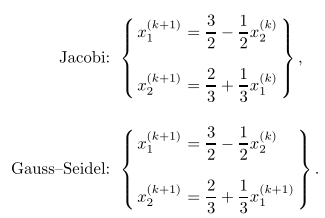 

Ak vezmeme štartovací bod resp. počiatočnú aproximáciu $x^{(0)}=(0,0)'$, tak dostaneme postupnosti približných riešení uvedené v tabuľke: 

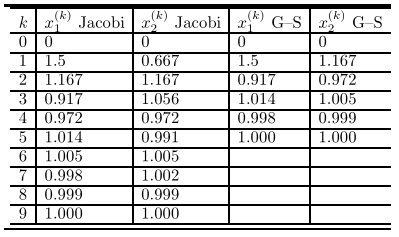 
$$\text{Zdroj: Ackleh (2009).}$$ 

Všimnime si, že Gaussova-Seidelova metóda konverguje k presnému riešeniu zhruba dvakrát rýchlejšie ako Jacobiho metóda. Toto správanie sa dá aj matematicky dokázať. 

---

<font color=orange> Výpočty uvedené v tabuľke Príkladu 2 odkrokujte v Python-e. </font>

<font color=purple> EXTRA: Nájdite príklad matice sústavy, kedy Gaussova-Seidelova metóda konverguje ale Jacobiho metóda nekonverguje a vice versa. (Ne)konvergenciu overte výpočtom v Python-e. Za každý zo scenárov môžete získať jeden bonusový bod.</font>

## Relaxačné metódy

Hneď potom, ako je pomocou základnej metódy (Jacobiho alebo Gaussova-Seidelova) vypočítaná $i$-tá zložka $x_i^{(k+1)}$, urobí sa nasledovná modifikácia 

$$x_i^{(k+1)} := (1-\omega)x_i^{(k)}+\omega x_i^{(k+1)},$$ 

kde $\omega>0$ je tzv. **_relaxačný parameter_**. Volíme ho tak, aby sme vylepšili konvergenciu základnej metódy. Pre $\omega=1$ dostaneme pôvodnú metódu. Pri $\omega<1$ ide o tzv. **_dolnú relaxáciu_** a pri $\omega>1$ o **_hornú relaxáciu_**. Efektívna voľba relaxačného parametra $\omega$ závisí na zvolenej základnej metóde a na matici sústavy $\mathbf{A}$. 

Praktické skúsenosti potvrdzujú, že dolná relaxácia môže zaistiť konvergenciu v prípade, keď základná metóda nekonverguje. Vhodnou voľbou relaxačného parametra je možné rýchlosť konvergencie základnej metódy podstatne urýchliť. Pre zvolenú metódu a špeciálny tvar matice $\mathbf{A}$ sú známe vzorce pre optimálnu hodnotu $\omega_{opt}$ relaxačného parametra. Tieto vzorce však majú skôr teoretický význam, lebo výpočet podľa nich je príliš náročný. Preto sa pracuje s premenlivým relaxačným faktorom, pričom v $k$-tej iterácii je to $\omega_k$ a jeho hodnota sa v každej iterácii spresňuje tak, aby sa postupne blížila k optimálnemu $\omega_{opt}$. Konkrétne metódy sa dajú nájsť v špecializovanej literatúre. 

### Relaxácia Jacobiho metódy 

Dá sa ukázať, že **keď konverguje Jacobiho metóda, tak konverguje i relaxovaná Jacobiho metóda pre $0<\omega\le1$**. 

### Relaxácia Gaussovej-Seidelovej metódy

Je v literatúre známa ako **_SOR metóda_** (ang. *Successive Over Relaxation*). O konvergencii SOR metódy sú k dispozícii tieto poznatky: 

1. Ak SOR metóda konverguje, tak je $0<\omega<2$. 


2. Ak je $\mathbf{A}$ rýdzo diagonálne dominantná a $0<\omega\le1$, potom SOR metóda konverguje. 


3. Ak je $\mathbf{A}$ pozitívne definitná a $0<\omega<2$, potom SOR metóda konverguje. 


SOR metóda zapísaná po zložkách má tvar 

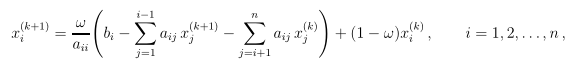  

a maticový zápis vyzerá nasledovne: 

\begin{align*}\label{eq:SOR1} \tag{8}
(\mathbf{D}+\omega\mathbf{L})\mathbf{x}_{k+1}=\left[(1-\omega)\mathbf{D}-\omega\mathbf{U}\right]\mathbf{x}_k+\omega\mathbf{b}. 
\end{align*} 

Keď v zložkovom zápise SOR metódy na pravej strane miesto $x_j^{(k+1)}$ píšeme $x_j^{(k)}$, dostaneme relaxáciu Jacobiho metódy označovanú ako JOR metóda, ktorej maticový zápis vyzerá takto: 

\begin{align*}\label{eq:JOR1} \tag{9}
\mathbf{D}\mathbf{x}_{k+1}=\left[(1-\omega)\mathbf{D}-\omega(\mathbf{L}+\mathbf{U})\right]\mathbf{x}_k+\omega\mathbf{b}. 
\end{align*} 


Nasledujúca matematická veta poskytuje **postačujúcu podmienku pre konvergenciu SOR metódy**, pričom dôkaz je možné nájsť napr. v Ackleh et al (2009). 

--- 

### <font color=green> Veta 2 (Ostrowski-Reich) </font> 

Ak $\mathbf{A}$ je Hermitovská, pozitívne definitná matica, ktorej najmenšie vlastné vlastné číslo $\sigma$ spĺňa $0<\sigma<2$, potom SOR metóda konverguje pre ľubovoľný počiatočný vektor $\mathbf{x}_0$.

---

### Symetrická horná relaxácia

V literatúre známa ako **_SSOR metóda_** (ang. *Symmetric Successive Overrelaxation*). Jeden krok metódy je definovaný pomocou dvoch polkrokov, z ktorých prvý je SOR krok a druhý je spätný SOR krok: 

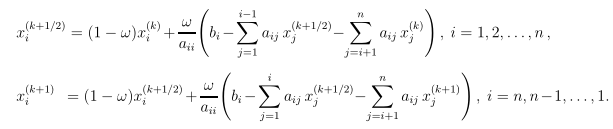 

Maticový zápis SSOR metódy je v tvare 

\begin{align*}\label{eq:SSOR1} \tag{10}
(\mathbf{D}+\omega\mathbf{L})\mathbf{x}_{k+1/2}=\left[(1-\omega)\mathbf{D}-\omega(\mathbf{U})\right]\mathbf{x}_k+\omega\mathbf{b}, \\ 
\\
(\mathbf{D}+\omega\mathbf{U})\mathbf{x}_{k+1}=\left[(1-\omega)\mathbf{D}-\omega(\mathbf{L})\right]\mathbf{x}_{k+1/2}+\omega\mathbf{b}. 
\end{align*}  

Vylúčením $x_{k+1/2}$ dostaneme predpis 

$$\mathbf{M}\mathbf{x}_{k+1}=\mathbf{N}\mathbf{x}_k+\mathbf{b},$$ 

kde

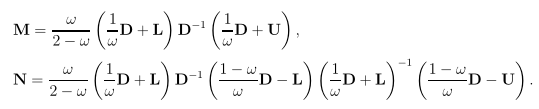 

Postačujúce podmienky konvergencie sú rovnaké ako pre SOR metódu: matica $\mathbf{A}$ rýdzo diagonálne dominantná a $0<\omega\le1$ alebo $\mathbf{A}$ pozitívne definitná a $0<\omega<2$. Ak je $\mathbf{A}$ symetrická, potom $\mathbf{U}=\mathbf{L}'$, takže 

\begin{align*}\label{eq:SSOR2} \tag{11}
\mathbf{M}=\dfrac{1}{\omega(2-\omega)}(\mathbf{D}+\omega\mathbf{L})\mathbf{D}^{-1}(\mathbf{D}+\omega\mathbf{L}'). 
\end{align*} 

**Táto matica sa niekedy používa ako predpodmieňovacia v _metóde združených gradientov_** (na jej urýchlenie), ktorú predstavíme v ďalšej časti. Ak je $\omega=1$, dostaneme *symetrickú Gaussovu-Seidelovu metódu*, stručne *SGS metódu*. 

***
<a id=dalsie></a>
 # <font color=brown> Ďalšie iteračné metódy </font> 

Klasické iteračné metódy sa v súčasnej praxi nepoužívajú až tak často. Venovali sme sa im hlavne preto, že sú pomerne jednoduché a pritom je možné na nich dobre ilustrovať, ako iteračné metódy fungujú. V tejto časti predstavíme dve typické, v aplikáciach štandardne používané, iteračné metódy: *zovšeobecnenú metódu minimálnych reziduí* pre SLR s ľubovoľnou regulárnou maticou sústavy a *metódu združených gradientov* pre SLR so symetrickou a pozitívne definitnou maticou sústavy. Existujú pochopiteľne i ďalšie iteračné metódy. 

## Zovšeobecnená metóda minimálnych reziduií 

Cieľom je nájsť riešenie $\mathbf{x}^*$ SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$, kde $\mathbf{A}$ je nejaká regulárna matica. Začneme tým, že objasníme, ako funguje _metóda minimálnych reziduí_. 



### Metóda minimálnych reziduí 

Približné riešenie $\mathbf{x}_{k+1}$ sa hľadá v tvare 

\begin{align*}\label{eq:MR1} \tag{12}
\mathbf{x}_{k+1}=\mathbf{x}_k+\alpha_k\mathbf{r}_k,  
\end{align*} 

kde $\mathbf{r}_k=\mathbf{b}-\mathbf{A}\mathbf{x}_k\neq\mathbf{0}$ je reziduum (ak $\mathbf{r}_k=0$, potom $\mathbf{x}_k=\mathbf{x}^*$), $\alpha_k$ je koeficient určený tak, aby dĺžka $\lVert\mathbf{r}_{k+1}\rVert_2$ vektora nového rezidua $\mathbf{r}_{k+1}=\mathbf{b}-\mathbf{A}\mathbf{x}_{k+1}$ bola minimálna. 

Ďalej $(\mathbf{u},\mathbf{v})=\mathbf{u}'\mathbf{v}$ bude označovať **skalárny súčin vektorov** $\mathbf{u}$, $\mathbf{v}$. Tým pádom platí $\lVert\mathbf{u}\rVert_2=(\mathbf{u},\mathbf{u})^{1/2}$. Dolný index $_2$ budeme teraz vynechávať, t.j. $\lVert\mathbf{u}\rVert\equiv\lVert\mathbf{u}\rVert_2$. 

Koeficient $\alpha_k$ dostaneme minimalizáciou funkcie 

$$\varphi(\alpha)=\lVert\mathbf{b}-\mathbf{A}(\mathbf{x}_k+\alpha\mathbf{r}_k)\rVert^2=\lVert\mathbf{r}_k-\alpha\mathbf{A}\mathbf{r}_k\rVert^2=\lVert\mathbf{r}_k\rVert^2-2\alpha(\mathbf{r}_k,\mathbf{A}\mathbf{r}_k)+\alpha^2\lVert\mathbf{A}\mathbf{r}_k\rVert^2.$$ 

Keďže 

$$\varphi'(\alpha)=-2(\mathbf{r}_k,\mathbf{A}\mathbf{r}_k)+2\alpha\lVert\mathbf{A}\mathbf{r}_k\rVert^2, \quad \varphi''(\alpha)=2\lVert\mathbf{A}\mathbf{r}_k\rVert^2,$$

tak $\varphi(\alpha)$ nadobúda minimum pre  

\begin{align*}\label{eq:MR2} \tag{13}
\mathbf{\alpha}_{k}=\dfrac{(\mathbf{r}_k,\mathbf{A}\mathbf{r}_k)}{(\mathbf{A}\mathbf{r}_k,\mathbf{A}\mathbf{r}_k)}.  
\end{align*} 

Metóda minimálnych reziduí sa niekedy označuje skratkou **_MR_** (ang. _minimal residual_). Ide o jednokrokovú metódu: k určeniu $\mathbf{x}_{k+1}$ stačí poznať iba $\mathbf{x}_k$ a $\mathbf{r}_k$ z bezprostredne predchádzajúceho kroku. 

Dá sa ukázať, že **metóda MR konverguje**, tzn. $\mathbf{x}_k\to\mathbf{x}^*$, napr. vtedy, keď $\mathbf{A}$ je pozitívne definitná matica. Metódu MR preto zovšeobecníme tak, aby konvergencia nastala pre každú regulárnu maticu $\mathbf{A}$. 

--- 

#### <font color=blue> Príklad 4 </font>  

In [9]:
# metoda minimalnych rezidui 
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import minres

A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
A = A + A.T # symetricka matica sustavy 
print('A = ')
print(A.toarray())
print('') 
b = np.array([2, 4, -1], dtype=float) # vektor pravych stran 
print('b = ')
print(b)
print('')
x, exitCode = minres(A, b) # riesenie SLR metodou minimalnych rezidui 
print('Numericke riesenie metodou minimalnyc rezidui: ') 
print(x)
print('') 
print('Konvergencia: ')
print(exitCode) # 0 indikuje uspesnu konvergenciu 
print('') 
print('Overenie numerickeho riesenia: ')
print(np.allclose(A.dot(x), b)) # overenie presnosti numerickeho riesenia 

A = 
[[ 6.  3.  0.]
 [ 3. -2.  5.]
 [ 0.  5.  2.]]

b = 
[ 2.  4. -1.]

Numericke riesenie metodou minimalnyc rezidui: 
[ 0.50520833 -0.34375     0.359375  ]

Konvergencia: 
0

Overenie numerickeho riesenia: 
True


--- 

--- 

### <font color=red> Definícia 1 </font> 

Nech $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m$, $m\in\mathbb{N}$ sú vektory z vektorového priestoru $V$ nad poľom $\mathbb{F}$, tzn. $\mathbf{v}_i\in V(\mathbb{F})$, $i=1,2,\ldots,m$.
**_Lineárny obal $[\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m]$ vektorov_** $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m$ je vektorový (pod)priestor generovaný týmito vektormi, t.j. 

$$[\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m]=\left\{\mathbf{v};\,\,\mathbf{v}=\displaystyle\sum\limits_{i=1}^{m}\alpha_i\mathbf{v}_i\,\,\alpha_i\in\mathbb{R},\,i=1,2,\ldots,m\right\}.$$

---

--- 

#### Poznámka 5

* Podľa Definície 1 je **lineárny obal** vektorov $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m$ v podstate **množina všetkých lineárnych kombinácií** týchto vektorov.  


* My zväčša pracujeme s vektormi, ktoré predstavujú usporiadané $n$-tice reálnych čísel, preto $\mathbb{F}=\mathbb{R}$ resp. $V=\mathbb{R}^n$, prípadne $\mathbb{F}=\mathbb{C}$ resp. $V=\mathbb{C}^n$, kde $\mathbb{C}$ sú komplexné čísla. 


* Pojem vektor je však možné chápať všeobecnejše - konkrétne napr. v téme 2 sme pod pojmom vektor rozumeli funkcie patriace do určitej triedy funkcií. 

---

--- 

### <font color=red> Definícia 2 </font> 

Vektorový priestor $\mathcal{K}_m(\mathbf{C},\mathbf{v})=[\mathbf{v},\mathbf{C}\mathbf{v},\ldots,\mathbf{C}^{m-1}\mathbf{v}]$ sa nazýva **_Krylovov priestor_** (pre dané prirodzené číslo $m$, maticu $\mathbf{C}$ a vektor $\mathbf{v}$). 

---

--- 

#### Poznámka 6

* $\mathcal{K}_m(\mathbf{C},\mathbf{v})$ je podpriestor $\mathbf{R}^{n}$, kde $n$ je rád matice $\mathbf{C}$.  


* Dimenzia $\mathcal{K}_m(\mathbf{C},\mathbf{v})$ je zrejme nanajvýš rovná $\min\{m,n\}$. 


* Je známe, že **riešenie SLR má prirodzenú reprezentáciu ako prvok Krylovovho podpriestoru**, pričom keď má tento podpriestor  malú dimenziu, tak riešenie SLR je možné nájsť presne resp. je možné ho dobre aproximovať už po niekoľkých iteráciách. Preto Krylovov podpriestor bude kľúčový pre ďalšie iteračné metódy a riešenie SLR budeme hľadať práve v ňom (resp. projekciou do tohto podpriestoru). 

---

Iteračné metódy na riešenie SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$, ktoré budú ďalej prezentované, sa dajú chápať z geometrického hľadiska ako tzv. **_projekčné metódy_**. Všeobecná projekčná metóda hľadá aproximáciu $\tilde{\mathbf{x}}$ z afinného podpriestoru $\mathbf{x}_0+\mathcal{K}$ s dimenziou $m$ (kde $\mathbf{x}_0$ je ľubovoľný počiatočný odhad), pričom má byť splnená _Petrovova-Galerkinova podmienka_ $\mathbf{b}-\mathbf{A}\tilde{\mathbf{x}} \perp \mathcal{L}$, kde $\mathcal{L}$ je ďalší tzv. testovací podpriestor s dimenziou $m$. 

Nech $\tilde{\mathbf{x}}=\mathbf{x}_0+\boldsymbol{\delta}$, $\boldsymbol{\delta}\in\mathcal{K}$ a počiatočné rezíduum $\mathbf{r}_0=\mathbf{b}-\mathbf{A}\mathbf{x}_0$. Potom Petrovova-Galerkinova podmienka má tvar $(\mathbf{r}_0-\mathbf{A}\boldsymbol{\delta},\mathbf{w})=\mathbf{0}$ $\forall\mathbf{w}\in\mathcal{L}$, kde $\mathbf{r}_{new}=\mathbf{r}_0-\mathbf{A}\boldsymbol{\delta}$ je nové rezíduum. Toto je základný projekčný krok. 

Predošlé úvahy je možné zapísať maticovo. Nech $\mathbf{V}=(\mathbf{v}_1,\ldots,\mathbf{v}_m)$ je báza podpriestoru $\mathcal{K}$ a $\mathbf{W}=(\mathbf{w}_1,\ldots,\mathbf{w}_m)$ je báza podpriestoru $\mathcal{L}$. Potom $\tilde{\mathbf{x}}=\mathbf{x}_0+\mathbf{V}\mathbf{y}$ a $\mathbf{y}$ je riešenie rovnice $\mathbf{W}'\mathbf{A}\mathbf{V}\mathbf{y}=\mathbf{W}'\mathbf{r}_0$. 

* Nech $\mathbf{A}$ je symetrická, pozitívne definitná matica a nech $\mathcal{L}=\mathcal{K}$. Potom vektor $\tilde{\mathbf{x}}$ je výsledkom ortogonálnej projekcie na $\mathcal{K}$ s počiatočným vektorom $\mathbf{x}_0$ práve vtedy, keď 

$$E(\tilde{\mathbf{x}})=\underset{\mathbf{x}\in\mathbf{x}_0+\mathcal{K}}{\min}\, E(\mathbf{x}), \quad E(\mathbf{x})=\left(\mathbf{A}\left(\mathbf{x}^*-\mathbf{x}\right),\mathbf{x}^*-\mathbf{x}\right)^{1/2},$$ 

kde $\mathbf{x}^*$ je riešenie sústavy $\mathbf{A}\mathbf{x}=\mathbf{b}$.


* Nech $\mathbf{A}$ je regulárna a $\mathcal{L}=\mathbf{A}\mathcal{K}$. Potom vektor $\tilde{\mathbf{x}}$ je výsledkom šikmej projekcie na $\mathcal{K}$ ortogonáne vzhľadom na $\mathcal{L}$ s počiatočným vektorom $\mathbf{x}_0$ práve vtedy, keď 

$$R(\tilde{\mathbf{x}})=\underset{\mathbf{x}\in\mathbf{x}_0+\mathcal{K}}{\min}\, R(\mathbf{x}), \quad R(\mathbf{x})=\lVert\mathbf{b}-\mathbf{A}\mathbf{x}\rVert.$$

Nasledujúci obrázok ilustruje ortogonálny projektor $\mathbf{P}$ na podpriestor $\mathcal{K}$ a tiež šikmý projektor $\mathbf{Q}$ na podpriestor $\mathcal{K}$ s využitím podpriestoru $\mathcal{L}$. 

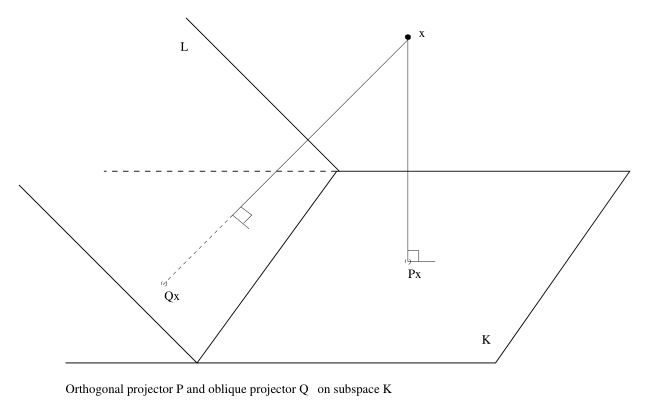

### Zovšeobecnená metóda minimálnych reziduí

Skrátene **_GMRES_** (ang. *generalized minimal residual*) - približné riešenie $\mathbf{x}_m$ SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$ hľadáme v tvare 

$$\mathbf{x}_m=\mathbf{x}_0+\boldsymbol{\delta}_m,$$ 

kde $\boldsymbol{\delta}_m\in\mathcal{K}_m\equiv\mathcal{K}_m(\mathbf{A},\mathbf{r}_0)$ vyberieme tak, aby norma $\lVert\mathbf{r}_m\rVert$ rezidua $\mathbf{r}_m=\mathbf{b}-\mathbf{A}\mathbf{x}_m$ bola minimálna, t.j. aby 

\begin{align*}\label{eq:GMRES1} \tag{14}
\lVert\mathbf{r}_m\rVert^2=\lVert\mathbf{r}_0-\mathbf{A}\boldsymbol{\delta}_m\rVert^2\le\lVert\mathbf{r}_0-\mathbf{A}\boldsymbol{\delta}\rVert^2, \quad \forall\boldsymbol{\delta}\in\mathcal{K}_m.  
\end{align*} 

Predpokladajme, že $\mathcal{K}_m$ má dimenziu $m$. Keďže prirodzená báza $\{\mathbf{r}_0,\mathbf{A}\mathbf{r}_0,\ldots,\mathbf{A}^{m-1}\mathbf{r}_0\}$ priestoru $\mathcal{K}_m$ je zle podmienená (čo vedie k nepresným/nestabilným výpočtom $\mathbf{x}_m$), zostrojí sa v tomto priestore ortonormálna báza ([Gramov-Schmidtov ortogonalzačný proces](https://sk.wikipedia.org/wiki/Gramov-Schmidtov_ortogonaliza%C4%8Dn%C3%BD_proces)) $\{\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m\}$ a $\mathbf{x_m}$ hľadamé v tvare 

\begin{align*}\label{eq:GMRES2} \tag{15}
\mathbf{x}_m=\mathbf{x}_0+\mathbf{V}_m\mathbf{y}_m,  
\end{align*} 

kde $\boldsymbol{\delta}_m=\mathbf{V}_m\mathbf{y}_m$, keďže $\boldsymbol{\delta}_m\in\mathcal{K}_m$, ďalej $\mathbf{V}_m=(\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m)$ a $\mathbf{y}_m\in\mathbb{R}^m$, pričom $\mathbf{y}_m$ sa určí v súlade s \eqref{eq:GMRES1} tak, aby platilo 

\begin{align*}\label{eq:GMRES3} \tag{16}
\lVert\mathbf{r}_m\rVert^2=\lVert\mathbf{r}_0-\mathbf{A}\mathbf{V}_m\mathbf{y}_m\rVert^2\le\lVert\mathbf{r}_0-\mathbf{A}\mathbf{V}_m\mathbf{y}\rVert^2, \quad \forall\mathbf{y}\in\mathbb{R}^m.  
\end{align*} 

Navrhnutá metóda je $m$-kroková, lebo k zostrojeniu $\mathbf{x}_m$ sú potrebné vektory $\left\{\mathbf{v}_k\right\}_{k=1}^{m}$. 

Nasledujúci algoritmus (i ďalší po ňom) je modifikáciou Gramovho-Schmidtovho algoritmu, ktorý je prispôsobený na Krylovov podpriestor a nájde resp. vytvorí jeho ortonormálnu bázu.  

---

<b> <ins> Algoritmus AGS </ins> </b> (Arnoldi-Gram-Schmidt)

**Krok 1** 

Vstup: $\mathbf{A}$, $\mathbf{v}$; 

**Krok 2** 

Polož $\mathbf{v}_{1}:=\mathbf{v}/\lVert\mathbf{v}\rVert$; 

**Krok 3** 

Postupne pre $k=1,2,\ldots,m$ opakuj: 

* postupne pre $i=1,2,\ldots,k$ opakuj: $h_{ik}:=(\mathbf{A}\mathbf{v}_k,\mathbf{v}_i)$; 

* $\mathbf{w}_k:=\mathbf{A}\mathbf{v}_k-\displaystyle\sum\limits_{i=1}^{k}h_{ik}\mathbf{v}_i$; 

* $h_{k+1,k}:=\lVert\mathbf{w}_k\rVert$; 

* ak $h_{k+1,k}=0$: stop; 

* $\mathbf{v}_{k+1}:=\mathbf{w}_k/h_{k+1,k}$;

**Krok 4** 

Výstup: $\{\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m\}$.   

---

--- 

#### <font color=green> Tvrdenie 1 </font> 

Predpokladajme, že algoritmus AGS neskončí skôr než v $m$-tom kroku. Potom vektory $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m$ tvoria ortonormálnu bázu Krylovho podpriestoru $\mathcal{K}_m=\mathcal{K}_m(\mathbf{A},\mathbf{v})$.

--- 

--- 

#### <font color=green> Tvrdenie 2 </font> 

Označme $\mathbf{V}_m$ maticu typu $m\times n$, ktorej stĺpce tvoria vektory $\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m$. Ďalej nech $\bar{\mathbf{H}}_m$ je [horná Hessenbergova matica](https://en.wikipedia.org/wiki/Hessenberg_matrix) typu $(m+1)\times m$, ktorej nenulové prvky $h_{ik}$ sú definované algoritmom AGS, konkrétne 

$$\bar{\mathbf{H}}_m=\begin{cases}h_{ik}, \quad i=1,2,\ldots,k+1\\ \qquad\qquad\qquad\qquad\qquad\qquad\qquad k=1,2,\ldots,m\\ 0, \quad i=k+2,k+3,\ldots,m+1\end{cases}.$$

Ďalej nech $\mathbf{H}_m$ je matica, ktorú dostaneme z $\bar{\mathbf{H}}_m$ vynechaním posledného riadka. Potom 

\begin{align*}\label{eq:GMRES4} \tag{17}
\mathbf{A}\mathbf{V}_m=\mathbf{V}_m\mathbf{H}_m+\mathbf{w}_m\mathbf{e}_m',
\end{align*} 

\begin{align*}\label{eq:GMRES5} \tag{18}
\mathbf{A}\mathbf{V}_m=\mathbf{V}_{m+1}\bar{\mathbf{H}}_m,
\end{align*}

\begin{align*}\label{eq:GMRES6} \tag{19}
\mathbf{V}_m'\mathbf{A}\mathbf{V}_m=\mathbf{H}_m,
\end{align*}

pričom $\mathbf{e}_m$ je $m$-tý stĺpec jednotkovej diagonálnej matice rádu $m$. 

--- 

**Praktickú implementáciu algoritmu AGS predstavuje algoritmus AGSM.**

---

<b> <ins> Algoritmus AGSM </ins> </b> (Arnoldi-Gram-Schmidt modified)

**Krok 1** 

Vstup: $\mathbf{A}$, $\mathbf{v}$; 

**Krok 2** 

Polož $\mathbf{v}_{1}:=\mathbf{v}/\lVert\mathbf{v}\rVert$; 

**Krok 3** 

Postupne pre $k=1,2,\ldots,m$ opakuj: 

* $\mathbf{w}_k:=\mathbf{A}\mathbf{v}_k$; 

* postupne pre $i=1,2,\ldots,k$ opakuj: 
    
    * $h_{ik}:=(\mathbf{w}_k,\mathbf{v}_i)$; 
    
    * $\mathbf{w}_k:=\mathbf{w}_k-h_{ik}\mathbf{v}_i$; 

* $h_{k+1,k}:=\lVert\mathbf{w}_k\rVert$; 

* ak $h_{k+1,k}=0$: stop; 

* $\mathbf{v}_{k+1}:=\mathbf{w}_k/h_{k+1,k}$;

**Krok 4** 

Výstup: $\{\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m\}$.   

---

--- 

#### Poznámka 7

Keďže $\left(\mathbf{A}\mathbf{v}_k-\displaystyle\sum\limits_{j=1}^{i-1}h_{jk}\mathbf{v}_j,\mathbf{v}_i\right)=(\mathbf{A}\mathbf{v}_k,\mathbf{v}_i)=h_{ik}$, tak algoritmy AGS, AGSM sú ekvivalentné, no pri paralelnom výpočte je AGSM stabilnejší. 

---




#### Algoritmus metódy GMRES

Zo vzťahu $(16)$ plynie, že vektor $\mathbf{y}_m$ minimalizuje funkciu 

$$\varphi(\mathbf{y})=\lVert\mathbf{r}_0-\mathbf{A}\mathbf{V}_m\mathbf{y}\rVert.$$ 

To ale znamená, že $\mathbf{y}_m$ je riešením sústavy $n$ lineárnych rovníc o $m$ neznámych ($n>m$)

$$\mathbf{A}\mathbf{V}_m\mathbf{y}\cong\mathbf{r}_0$$ 

v zmysle **_metódy najmenších štvorcov_** (tzn., že $\lVert\mathbf{r}_0-\mathbf{A}\mathbf{V}_m\mathbf{y}_m\rVert\le\lVert\mathbf{r}_0-\mathbf{A}\mathbf{V}_m\mathbf{y}\rVert$, $\forall\mathbf{y}\in\mathbb{R}^m$). Stĺpce matice $\mathbf{V}_m$ sú lineárne nezávislé, tým pádom aj stĺpce matice $\mathbf{A}\mathbf{V}_m$ sú lineárne nezávislé (prečo?), a preto je $\mathbf{y}_m$ určené jednoznačne (viď metóda najmenších štvorcov). 

**Metóda GMRES v každej iterácii nájde aproximáciu riešenia SLR, ktorá je riešením úlohy najmenších štvorcov a patrí do Krylovovho podpriestoru. K riešeniu problému najmenších štvorcov sa využíva ortonormálna báza Krylovovho podpriestoru a QR rozklad.** 

Ďalej popíšeme **efektívny výpočet vektora $\mathbf{y}_m$**. Využije sa nasledujúca vlastnosť: Ak matica $\mathbf{Q}$ je ortogonálna, tzn. spĺňa podmienku $\mathbf{Q}'\mathbf{Q}=\mathbf{I}$, tak $\lVert\mathbf{v}\rVert=\lVert\mathbf{Q}\mathbf{v}\rVert$. Skutočne 

$$\lVert\mathbf{Q}\mathbf{v}\rVert^2=(\mathbf{Q}\mathbf{v})'(\mathbf{Q}\mathbf{v})=\mathbf{v}'\mathbf{Q}'\mathbf{Q}\mathbf{v}=\mathbf{v}'\mathbf{v}=\lVert\mathbf{v}\rVert^2.$$ 

Označme $\lVert\mathbf{r}_0\rVert=\beta$, potom $\mathbf{v}_1=\beta^{-1}\mathbf{r}_0$ a teda 

$$\mathbf{r}_0=\beta\mathbf{v}_1=\mathbf{V}_{m+1}\beta\bar{\mathbf{e}}_1,$$

kde $\bar{\mathbf{e}}_1$ je prvý stĺpec jednotkovej diagonálnej matice rádu $m+1$. Odtiaľ pomocou $(18)$ dostaneme 

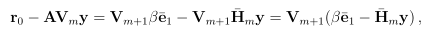

a keďže vzhľadom k ortonormalite bázy $\left\{\mathbf{v}_i\right\}_{i=1}^{m+1}$ je $\mathbf{V}_{m+1}'\mathbf{V}_{m+1}=\mathbf{I}$, tak máme 

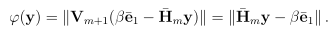 

Preto $\mathbf{y}_m$ získame riešením sústavy $m+1$ rovníc s $m$ neznámymi 

\begin{align*}\label{eq:GMRES8} \tag{21}
\bar{\mathbf{H}}_m\mathbf{y}\cong\beta\bar{\mathbf{e}}_1
\end{align*} 

metódou najmenších štvorcov. Štandardný postup je založený na tzv. **_QR rozklade matice_** (detaily napr. v doplňujúcich materiáloch)

$$\bar{\mathbf{H}}_m=\mathbf{Q}_{m+1}\bar{\mathbf{R}}_m,$$ 

kde $\mathbf{Q}_{m+1}$ je ortonormálna matica rádu $m+1$ a $\bar{\mathbf{R}}_m$ je horná trojuholníková matica, 

$$\bar{\mathbf{R}}_m=\left\{\bar{r}_{ik}\right\},\qquad \bar{r}_{ik}=\begin{cases}r_{ik},\,\,i=1,2,\ldots,k\\ \qquad\qquad\qquad\qquad\qquad\qquad\qquad k=1,2,\ldots,m\\
0,\,\,i=k+1,k+2,\ldots,m+1\end{cases}.$$ 

Nateraz predpokladajme, že máme k dispozícii QR rozklad matice $\bar{\mathbf{H}}_m$, t. j. poznáme matice $\mathbf{Q}_{m+1}$, $\bar{\mathbf{R}}_m$. Potom 

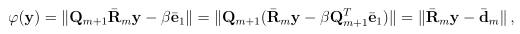 

kde $\bar{\mathbf{d}}_{m}=\beta\mathbf{Q}_{m+1}'\bar{\mathbf{e}}_1$. Ďalej nech 

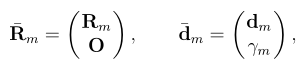 

kde $\mathbf{R}_m$ je matica rádu $m$, $\mathbf{O}$ je nulová matica rozmerov $1\times m$, $\mathbf{d}_m$ je vektor dimenzie $m\times1$ a $\gamma_m$ je skalár. Keďže 

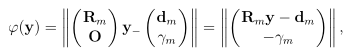 

tak $\varphi(\mathbf{y})$ nadobúda minimálnu hodnotu $\varphi(\mathbf{y}_m)$ práve vtedy, keď 

\begin{align*}\label{eq:GMRES9} \tag{22}
\mathbf{R}_m\mathbf{y}_m=\mathbf{d}_m. 
\end{align*}

Potom $\varphi(\mathbf{y}_m)=|\gamma_m|$. Podľa vzťahu $(16)$ je $\varphi(\mathbf{y}_m)=\lVert\mathbf{r}_m\rVert$ a teda dostávame 

\begin{align*}\label{eq:GMRES10} \tag{23}
\lVert\mathbf{r}_m\rVert=|\gamma_m|. 
\end{align*}

Ak $\gamma_m=0$, tak $\mathbf{x}_m=\mathbf{x}^*$. Teraz už môžeme uviesť algoritmus GMRES(m). 


<font color=purple> EXTRA: Prečo, ak sú stĺpce matice $\mathbf{V}_m$ lineárne nezávislé, tak aj stĺpce matice $\mathbf{A}\mathbf{V}_m$ sú lineárne nezávislé? Tento poznatok sa využíva v odvodení algoritmu metódy GMRES. Za správne zdôvodnenie je možné získať jeden bonusový bod. </font> 

---

<b> <ins> Algoritmus GMRES(m) </ins> </b> 

**Krok 1** 

Vstup: $\mathbf{A}$, $\mathbf{b}$, $\mathbf{x}_0$, $\varepsilon$, $m$, $nrmax$; 

**Krok 2** 

Postupne pre $nr=1,2,\ldots,nrmax$ opakuj: 

* $\mathbf{r}_0:=\mathbf{b}-\mathbf{A}\mathbf{x}_0$; $\beta:=\lVert\mathbf{r}_0\rVert$; $\mathbf{v}_1:=\mathbf{r}_0/\beta$; 

* postupne pre $k=1,2,\ldots,m$ opakuj: 

    * $\mathbf{w}_k:=\mathbf{A}\mathbf{v}_k$; 
    
    * postupne pre $i=1,2,\ldots,k$ opakuj: 
    
        * $h_{ik}:=(\mathbf{w}_k,\mathbf{v}_i)$; 
        
        * $\mathbf{w}_k:=\mathbf{w}_k-h_{ik}\mathbf{v}_i$; 
        
    * $h_{k+1,k}:=\lVert\mathbf{w}_k\rVert$, zostav $\bar{\mathbf{H}}_k$; vypočítaj $\mathbf{R}_k$, $\mathbf{d}_k$, $\gamma_k$; 
    
    * ak $|\gamma_k|<\varepsilon$ alebo $k=m$: 
    
        * $\mathbf{y}_k:=\mathbf{R}_k^{-1}\mathbf{d}_k$; $\mathbf{x}:=\mathbf{x}_0+\mathbf{V}_k\mathbf{y}_k$; 
        
        * ak $|\gamma_k|<\varepsilon$: stop; 
        
      inak $\mathbf{v}_{k+1}:=\mathbf{w}_k/h_{k+1,k}$; zostav $\mathbf{V}_{k+1}$; 
    
* $\tilde{\mathbf{x}}:=\mathbf{x}$; 

**Krok 3** 

Výstup: vráť $\tilde{\mathbf{x}}$ alebo vypíš "GMRES(m) nekonverguje".   

---

**Niekoľko poznámok ku algoritmu GMRES(m):** 

1. Všimnime si, že algoritmus GMRES(1) je ekvivalentný s algoritmom MR. GMRES(m) je zrejme $m$-kroková metóda. 


2. Označme ako GMRES algoritmus GMRES(n). GMRES je možné považovať za minimalizačnú metódu, totiž približné riešenie $\mathbf{x}_k=\mathbf{x}_0+\mathbf{V}_k\mathbf{y}_k$ je definované takto: určiť $\mathbf{x}_k\in\mathbf{x}_0+\mathcal{K}_k(\mathbf{A},\mathbf{r}_0)$ spĺňajúce $\lVert\mathbf{b}-\mathbf{A}\mathbf{x}_k\rVert\le\lVert\mathbf{b}-\mathbf{A}\mathbf{x}\rVert$ $\forall\mathbf{x}\in\mathbf{x}_0+\mathcal{K}_k(\mathbf{A},\mathbf{r}_0)$. Ak by sme počítali presne (s nekonečnou presnosťou), tak na konci algoritmu GMRES by sme dostali presné riešenie $\mathbf{x}=\mathbf{x}^*$ pre nejaké $k\le n$. 


3. O metóde GMRES sa niekedy hovorí ako o *metóde kosouhlej projekcie* (ang. *oblique projection*), čím sa myslí to, že $\mathbf{x}_m$ určujeme tak, aby platilo nasledovné: $\mathbf{x}_m-\mathbf{x}_0\in\mathcal{K}_m$ a súčasne $\mathbf{r}_m\perp\mathcal{L}_m$, kde $\mathcal{L}_m=\mathbf{A}\mathcal{K}_m$. Ľahko sa overí, že potom $\mathbf{r}_m$ minimalizuje $\lVert\mathbf{b}-\mathbf{A}\mathbf{x}\rVert$ v priestore $\mathbf{x_0}+\mathcal{K}_m$. <br/>


4. Pre veľké $m$ je potrebné v pamäti počítača uchovávať matice $\mathbf{V}_m$, $\bar{\mathbf{H}}_m$, ktoré sú pre veľké $n$ značne rozsiahle. Kvôli tomu sa obvykle volí $m$ rádovo v desiatkach. V takom prípade sa ale môže stať, že konvergencia metódy GMRES(m) je veľmi pomalá. Preto býva obmedzený maximálny počet tzv. reštartov (viď parameter $nrmax$ na začiatku algoritmu). 


5. $\mathbf{R}_k$, $\mathbf{d}_k$, $\gamma_k$ počítame *Givensovym QR algoritmom* (pozri doplnkový materiál), v ktorom sa využije to, že matica $\bar{\mathbf{H}}_k$ má pod hlavnou diagonálou nenulové iba prvky $h_{i+1,i}$, $i=1,2,\ldots,k$. 


6. Rýchlosť konvergencie je možné podstatne zvýšiť, keď miesto rovnice $\mathbf{A}\mathbf{x}=\mathbf{b}$ riešime rovnicu $\mathbf{M}^{-1}\mathbf{A}\mathbf{x}=\mathbf{M}^{-1}\mathbf{b}$, kde $\mathbf{M}$ je tzv. podmieňovacia matica. Za $\mathbf{M}$ je možné zvoliť napr. [neúplný LU rozklad rozklad matice](https://en.wikipedia.org/wiki/Incomplete_LU_factorization) $\mathbf{A}$. Inverzná matica $\mathbf{M}^{-1}$ sa v skutočnosti neráta. Algoritmus GMRES(m) sa upraví nasledovne: v kroku 2 sa zmení prvý bod takto: určí sa $\mathbf{z}_0$ ako riešenie $\mathbf{M}\mathbf{z}_0=\mathbf{b}-\mathbf{A}\mathbf{x}_0$; $\beta:=\lVert\mathbf{z}_0\rVert$; $\mathbf{v}_1:=\mathbf{z}_0/\beta$; v kroku 2 sa zmení tretí bod takto: určí sa $\mathbf{w}_k$ ako riešenie $\mathbf{M}\mathbf{w}_k=\mathbf{A}\mathbf{v}_k$. 


7. V Python-e je metóda GMRES(m) implementovaná ako funkcia `scipy.sparse.linalg.gmres()` a neúplný LU rozklad ako funkcia `scipy.sparse.linalg.spilu()`. 

--- 

#### <font color=blue> Príklad 5 </font>  

In [20]:
# neuplny LU rozklad matice A 
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spilu
# A = np.array([[1., 0., 0.], [5., 0., 2.], [0., -1., 0.]], dtype=float) 
A = csc_matrix([[1., 0., 0.], [5., 0., 2.], [0., -1., 0.]], dtype=float) 
print('A = ')
print(A.toarray()) # vypis matice A vo forme 2D pola 
print('==============================')
B = spilu(A) # neuplny LU rozklad matice A 
# print(B.L)
# print('==============================')
L = B.L.toarray()  
print('L = ')
print(L)
print('==============================') 
U = B.U.toarray() 
print('U = ')
print(U)
print('==============================') 
print('riesenie SLR pomocou neuplneho LU rozkladu') 
b = np.array([1., 2., 3.], dtype=float)
print(B.solve(b)) # riesenie 
print((A.dot(B.solve(b)))) # skuska spravnosti riesenia 
print(B.solve(A.dot(b)))

A = 
[[ 1.  0.  0.]
 [ 5.  0.  2.]
 [ 0. -1.  0.]]
L = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U = 
[[-1.  0.  0.]
 [ 0.  2.  5.]
 [ 0.  0.  1.]]
riesenie SLR pomocou neuplneho LU rozkladu
[ 1.  -3.  -1.5]
[1. 2. 3.]
[1. 2. 3.]


In [12]:
# implementacia GMRES v baliku SciPy 
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import gmres

A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float) # matica sustavy 
print('A = ')
print(A.toarray()) # objekt "riedka matica" sa prevedie na 2D pole kvoli citatelnejsiemu vypisu 
print('') 
b = np.array([2, 4, -1], dtype=float) # vektor pravych stran 
print('b = ')
print(b) 
print('')
x, exitCode = gmres(A, b) # riesenie SLR pomocou GMRES 
print('Numericke riesenie SLR metodou GMRES: ') 
print(x) 
print('') 
print('Konvergencia: ')
print(exitCode) # 0 indikuje uspesnu konvergenciu 
print('') 
print('Overenie numerickeho riesenia: ') 
print(np.allclose(A.dot(x), b)) # overenie numerickeho riesenia SLR 

A = 
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]

b = 
[ 2.  4. -1.]

Numericke riesenie SLR metodou GMRES: 
[ 2. -2.  9.]

Konvergencia: 
0

Overenie numerickeho riesenia: 
True


--- 

## Metóda združených gradientov

Ide o jednu zo základných metód na riešenie SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$ s pozitívne definitnou (a symetrickou) maticou sústavy $\mathbf{A}$. Ďalej budeme teda predpokladať, že matica $\mathbf{A}$ je symetrická a p.d. To nám umožnuje definovať tzv. *vážený skalárny súčin* ("vážený" pomocou matice $\mathbf{A}$).    

--- 

### <font color=red> Definícia 3 </font> 

Je daný vektorový priestor $V=\mathbb{R}^n$ a pozitívne definitná matica $\mathbf{A}\in\mathbb{R}^{n\times n}$. **_Vážený skalárny súčin_** $(\mathbf{u},\mathbf{v})_{\mathbf{A}}$ (vzhľadom k matici $\mathbf{A}$) dvoch vektorov $\mathbf{u},\mathbf{v}\in V$ je definovaný predpisom: 

$$(\mathbf{u},\mathbf{v})_{\mathbf{A}}=\mathbf{u}'\mathbf{A}\mathbf{v}.$$

Príslušná **_vážená_** (_energetická_) **_norma_** je definovaná nasledovne: 

$$\lVert\mathbf{u}\rVert_{\mathbf{A}}=(\mathbf{u},\mathbf{u})_{\mathbf{A}}^{1/2}=\sqrt{\mathbf{u}'\mathbf{A}\mathbf{u}}.$$

---

Presné riešenie SLR $\mathbf{A}\mathbf{x}=\mathbf{b}$ budeme značiť $\mathbf{x}^*$. 

Pre lepšie pochopenie princípu, z ktorého vychádza *metóda združených gradientov*, poslúži jednoduchá *metóda najväčšieho spádu*. 

### Metóda najväčšieho spádu 

Približné riešenie $\mathbf{x}_{k+1}$ sa hľadá v tvare 

\begin{align*}\label{eq:ConjugGrad1} \tag{24}
\mathbf{x}_{k+1}=\mathbf{x}_k+\alpha_k\mathbf{r}_k, 
\end{align*}

kde $\mathbf{r}_k=\mathbf{b}-\mathbf{A}\mathbf{x}_k\neq\mathbf{0}$ je reziduum, $\alpha_k$ je koeficient určený tak, aby vážená norma $\lVert\mathbf{e}_{k+1}\rVert_{\mathbf{A}}$ chyby $\mathbf{e}_{k+1}=\mathbf{x}_{k+1}-\mathbf{x}^*$ bola minimálna. Koeficient $\alpha_k$ dostaneme minimalizáciou funkcie 

$$\varphi(\alpha)=\dfrac{1}{2}\left\lVert\mathbf{x}_k+\alpha\mathbf{r}_k-\mathbf{x}^*\right\rVert_{\mathbf{A}}^2=\dfrac{1}{2}\left(\mathbf{x}_k+\alpha\mathbf{r}_k-\mathbf{x}^*\right)'\mathbf{A}\left(\mathbf{x}_k+\alpha\mathbf{r}_k-\mathbf{x}^*\right).$$ 

Po zohľadnení symetrie matice $\mathbf{A}$ dostaneme 

$$\varphi(\alpha)'=\mathbf{r}_k'\mathbf{A}\left(\mathbf{x}_k+\alpha\mathbf{r}_k-\mathbf{x}^*\right)=\mathbf{r}_k'\left(\mathbf{A}\mathbf{x}_k+\alpha\mathbf{A}\mathbf{r}_k-\mathbf{b}\right)=\mathbf{r}_k'\left(\alpha\mathbf{A}\mathbf{r}_k-\mathbf{r}_k\right)$$ 

$$\varphi(\alpha)''=\mathbf{r}'\mathbf{A}\mathbf{r}_k.$$ 

Z nutnej podmienky $\varphi'(\alpha_k)=0$ pre extrém funkcie $\varphi(\alpha)$ určíme 

$$\alpha_k=\dfrac{(\mathbf{r}_k,\mathbf{r}_k)}{\left(\mathbf{r}_k,\mathbf{A}\mathbf{r}_k\right)},$$ 

a keďže matica $\mathbf{A}$ je p.d. (tým pádom príslušná kvadratická forma resp. funkcia je konvexná), tak uvedené $\alpha_k$ je hľadané minimum funkcie $\varphi$.

Rovnicu $\varphi'(\alpha_k)=0$, z ktorej sme určili $\alpha_k$ (a teda aj $\mathbf{x}_{k+1}$), je možné ekvivalentne zapísať v tvare 

$$\mathbf{r}_k'\left(\mathbf{A}\mathbf{x}_{k+1}-\mathbf{b}\right)=-\mathbf{r}_k'\mathbf{r}_{k+1}=0,$$

tzn. $\mathbf{x}_{k+1}$ sme určili tak, aby reziduum $\mathbf{r}_{k+1}$ bolo ortogonálne k predchádzajúcemu reziduu $\mathbf{r}_k$. 

Všimnime si, že približné riešenie $\mathbf{x}_{k+1}$ je minimom funkcie $\psi(\mathbf{x})=\dfrac{1}{2}\lVert\mathbf{x}-\mathbf{x}^*\rVert^2_{\mathbf{A}}$ na polpriamke $\mathbf{x}_k+\alpha\mathbf{r}_k$, $\alpha\ge0$. Keďže $\mathbf{r}_k=-\nabla\psi(\mathbf{x}_k)$, tak **minimum $\mathbf{x}_{k+1}$ hľadáme v smere najväčšieho spádu (poklesu) funkcie $\psi$**, čo vysvetľuje názov metódy. 

Zovšeobecnením metódy najväčšieho spádu je *metóda ortogonálnej projekcie*. 

### Metóda ortogonálnej projekcie 

Stručne označovaná **_FOM_** (ang. _full orthogonalization method_). Táto metóda počíta $\mathbf{x}_m$ tak, aby platilo $\mathbf{x}_m-\mathbf{x}_0\in\mathcal{K}_m$ a súčasne $\mathbf{r}_m\perp\mathcal{K}_m$. Približné riešenie sa hľadá rovnako ako v metóde GMRES a to v tvare 

\begin{align*}\label{eq:FOM1} \tag{25}
\mathbf{x}_{m}=\mathbf{x}_0+\mathbf{V}_m\mathbf{y}_m, 
\end{align*}

pričom sa zvolí $\mathbf{v}_1=\beta^{-1}\mathbf{r}_0$, kde $\beta=\lVert\mathbf{r_0}\rVert$, ďalej $\mathbf{v}_2,\mathbf{v}_3,\ldots,\mathbf{v}_m$ sa určia pomocou algoritmu AGSM a $\mathbf{y}_m$ sa určí tak, aby 

$$\mathbf{0}=\mathbf{V}_m'\mathbf{r}_m=\mathbf{V}_m'\left(\mathbf{b}-\mathbf{A}(\mathbf{x}_0+\mathbf{V}_m\mathbf{y}_m)\right)=\mathbf{V}_m'\mathbf{r}_0-\mathbf{V}_m'\mathbf{A}\mathbf{V}_m\mathbf{y}_m=\beta\mathbf{e}_1-\mathbf{H}_m\mathbf{y}_m.$$ 

Využilo sa nasledovné: $\mathbf{V}_m'\mathbf{r}_0=\mathbf{V}_m'\beta\mathbf{v}_1=\beta\mathbf{e}_1$, kde $\mathbf{e}_1$ je prvý stĺpec jednotkovej diagonálnej matice rádu $m$ a taktiež sa využil vzťah $(19)$. Vektor $\mathbf{y}_m$ je preto riešením sústavy $m$ lineárnych rovníc 

\begin{align*}\label{eq:FOM2} \tag{26}
\mathbf{H}_{m}\mathbf{y}_m=\beta\mathbf{e}_1.  
\end{align*}

Ak je $h_{m,m+1}=0$, potom $\mathbf{x}_m=\mathbf{x}^*$. Naozaj pomocou vzťahov $(15)$, $(17)$, $(26)$ dostaneme 

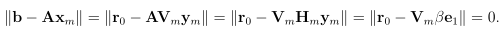 

Pre p.d. maticu $\mathbf{A}$ je rovnica $\mathbf{V}_m'\mathbf{r}_m=\mathbf{0}$ ekvivalentným vyjadrením toho, že $\mathbf{x}_m$ minimalizuje funkciu $\psi(\mathbf{x})=\dfrac{1}{2}\lVert\mathbf{x}-\mathbf{x}^*\rVert^2_{\mathbf{A}}$ na množine $\mathbf{x}_0+\mathcal{K}_m$ resp., že $\mathbf{y}_m$ minimalizuje funkciu $\varphi(\mathbf{y})=\dfrac{1}{2}\lVert\mathbf{x}_0+\mathbf{V}_m\mathbf{y}-\mathbf{x}^*\rVert_{\mathbf{A}}$ v $\mathbb{R}^m$. Totiž $\nabla\varphi(\mathbf{y})=\mathbf{V}_m'(\mathbf{A}\mathbf{x}-\mathbf{b})$, kde $\mathbf{x}=\mathbf{x}_0+\mathbf{V}_m\mathbf{y}$, $\nabla^2\varphi(\mathbf{y})=\mathbf{V}_m'\mathbf{A}\mathbf{V}_m$, takže pre minimum $\mathbf{y}_m$ funkcie $\varphi(\mathbf{y})$ platí $\mathbf{0}=\nabla\varphi(\mathbf{y}_m)=-\mathbf{V}_m'\mathbf{r}_m$. 


--- 

#### Poznámka 8

FOM je možné aplikovať i v prípade, keď matica $\mathbf{A}$ nie je p.d.. Potom sa $\mathbf{y}_m$ opäť určí zo vzťahu $(26)$ ale nepôjde už o minimum funkcie $\psi(\mathbf{x})$. 

---

**Pre p.d. maticu $\mathbf{A}$ sa dá $m$-kroková FOM metóda preformulovať na jednokrokovú metódu známu ako _metóda združených gradientov_.** Ďalej objasníme, ako sa to zrealizuje. Predpokladajme teda, že matica $\mathbf{A}$ je symetrická a pozitívne definitná. Podľa $(19)$ je matica $\mathbf{H}_m$ symetrická a keďže je to zároveň horná Hessenbergova matica, tak musí byť tridiagonálna 

\begin{align*}\label{eq:FOM3} \tag{27}
\mathbf{H}_{m}=\begin{pmatrix}\alpha_1 & \beta_2 & & & \\ \beta_2 & \alpha_2 & \beta_3 & & \\ & \ldots & \ldots & \ldots & \\ & & \beta_{m-1} & \alpha_{m-1} & \beta_m \\ & & & \beta_m & \alpha_m \end{pmatrix},  
\end{align*}

t.j. $h_{kk}=\alpha_k$, $h_{k,k+1}=h_{k+1,k}=\beta_k$. Pomocou LU rozkladu dostaneme 

\begin{align*}\label{eq:FOM4} \tag{28}
\mathbf{H}_m=\mathbf{L}_m\mathbf{U}_m=\begin{pmatrix}1 & & & & \\ \lambda_2 & 1 & & & \\ & \ldots & \ldots & \ldots & \\ & & \lambda_{m-1} & 1 & \\ & & & \lambda_m & 1\end{pmatrix}\begin{pmatrix}\eta_1 & \beta_2 & & & \\ & \eta_2 & \beta_3 & & \\ & \ldots & \ldots & \ldots & \\ & & & \eta_{m-1} & \beta_m \\ & & & & \eta_m \end{pmatrix},  
\end{align*} 

kde 

\begin{align*}\label{eq:FOM5} \tag{29}
&\eta_1=\alpha_1, \\
\\ 
&\lambda_k=\beta_k/\eta_{k-1}, \quad \eta_k=\alpha_k-\lambda_k\beta_k, \quad k=2,3,\ldots,m 
\end{align*}

Zo vzťahov $(25)-(28)$ plynie 

 

Ak označíme 

\begin{align*}\label{eq:FOM6} \tag{30}
\mathbf{P}_m=\mathbf{V}_m\mathbf{U}_m^{-1} \quad \text{ a } \quad \mathbf{z}_m=\mathbf{L}_m^{-1}\left(\beta\mathbf{e}_1\right)
\end{align*}

tak potom 

\begin{align*}\label{eq:FOM7} \tag{31}
\mathbf{x}_m=\mathbf{x}_0+\mathbf{P}_m\mathbf{z}_m.
\end{align*}

Z rovnice $\mathbf{P}_m\mathbf{U}_m=\mathbf{V}_m$ odvodíme pre stĺpce $\mathbf{p}_i$ matice $\mathbf{P}_m=(\mathbf{p}_1,\mathbf{p}_2,\ldots,\mathbf{p}_m)$ rekurzívny vzťah 

\begin{align*}\label{eq:FOM8} \tag{32}
&\mathbf{p}_1=\eta_1^{-1}\mathbf{v}_1, \\
\\
&\mathbf{p}_k=\eta_k^{-1}(\mathbf{v}_k-\beta_k\mathbf{p}_{k-1}), \quad k=2,3,\ldots,m. 
\end{align*}

Keďže $[\mathbf{p}_1,\mathbf{p}_2,\ldots,\mathbf{p}_m]=[\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m]$, tak $\left\{\mathbf{p}_i\right\}_{i=1}^m$ je báza v $\mathcal{K}_m(\mathbf{A},\mathbf{r}_0)$. Ak označíme $\mathbf{z}_m=(\zeta_1,\zeta_2,\ldots,\zeta_m)'$, tak potom z rovnice $\mathbf{L}_m\mathbf{z}_m=\beta\mathbf{e}_1$ dostaneme 

\begin{align*}\label{eq:FOM9} \tag{33}
&\zeta_1=\beta, \\
\\
&\zeta_k=-\lambda_k\zeta_{k-1}, \quad k=2,3,\ldots,m. 
\end{align*}

Zo vzťahov $(31)-(33)$ vyplýva rekurentný predpis na výpočet $\mathbf{x}_m$ :

\begin{align*}\label{eq:FOM10} \tag{34}
\mathbf{x}_k=\mathbf{x}_{k-1}+\zeta_k\mathbf{p}_k, \quad k=2,3,\ldots,m. 
\end{align*} 


**Vlastnosti vzťahov $(32)-(34)$**

1. Reziduum $\mathbf{r}_k$ sa dá zapísať v tvare 
\begin{align*}\label{eq:FOM11} \tag{35}
\mathbf{r}_k=\sigma_k\mathbf{v}_{k+1}, \quad k=0,1,\ldots,m-1, 
\end{align*} 
<br/>
kde $\sigma_k$ je určité číslo. To však znamená, že reziduá $\left\{\mathbf{r}_k\right\}_{k=0}^{m-1}$ sú navzájom ortogonálne lebo vektory $\left\{\mathbf{v}_k\right\}_{k=1}^{m}$ sú ortonormálne. 


2. Vektory $\left\{\mathbf{p}_i\right\}_{i=1}^{m}$ sú **_združené (konjugované) vzhľadom k matici $\mathbf{A}$_**, inými slovami sú $\mathbf{A}$-*ortogonálne*, t.j. platí $(\mathbf{p}_i,\mathbf{p}_j)_{\mathbf{A}}=0$ pre $i\neq j$. Vektory $\left\{\mathbf{p}_i\right\}_{i=1}^{m}$ teda tvoria $\mathbf{A}$-ortogonálnu bázu v $\mathcal{K}(\mathbf{A},\mathbf{r}_0)$. 

### Metóda združených gradientov 

Skrátene **_metóda CG_** (ang. _conjugate gradient_) alebo niekedy tiež nazývaná metóda združených smerov. 

Vektory $\mathbf{p}_k$ očíslujeme od nuly, takže podľa $(34)$ máme 

\begin{align*}\label{eq:ConjugGrad11} \tag{36}
\mathbf{x}_{k+1}=\mathbf{x}_{k}+\zeta_{k+1}\mathbf{p}_k, \quad k=0,1,\ldots,m-1. 
\end{align*} 

Ďalej pomocou $(33)$ a $(35)$ dostaneme 

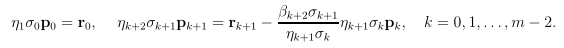 

Ak teraz označíme $\tilde{\mathbf{p}}_k=\eta_{k+1}\sigma_k\mathbf{p}_k$, $\tilde{\beta}_k=-\beta_{k+2}\sigma_{k+1}/(\eta_{k+1}\sigma_k)$, $k=0,1,\ldots,m-2$, tak potom platí 

\begin{align*}\label{eq:ConjugGrad2} \tag{37}
\tilde{\mathbf{p}}_{0}=\mathbf{r}_{0}, \quad \tilde{\mathbf{p}}_{k+1}=\mathbf{r}_{k+1}+\tilde{\beta}_k\tilde{\mathbf{p}}_k \quad k=0,1,\ldots,m-2. 
\end{align*} 

Vektory $\left\{\tilde{\mathbf{p}}_k\right\}_{k=0}^{m-1}$ sú $\mathbf{A}$-ortogonálne. Ak do vzťahu \eqref{eq:ConjugGrad11} dosadíme $\mathbf{p}_k=\tilde{\mathbf{p}}_k/(\eta_{k+1}\sigma_k)$, tak dostaneme  

\begin{align*}\label{eq:ConjugGrad3} \tag{38}
\mathbf{x}_{k+1}=\mathbf{x}_k+\alpha_k\tilde{\mathbf{p}}_k \quad k=0,1,\ldots,m-1,  
\end{align*}

kde $\alpha_k=\zeta_{k+1}/(\eta_{k+1}\sigma_k)$. Pokiaľ teraz $\tilde{\mathbf{p}}_k$ označíme zase ako $\mathbf{p}_k$ a miesto $\tilde{\beta}$ píšeme $\beta$, tak z \eqref{eq:ConjugGrad2}, \eqref{eq:ConjugGrad3} máme nasledovné: 

\begin{align*}\label{eq:ConjugGrad4} \tag{39}
\mathbf{x}_{0} \text{ dané, } \quad  \mathbf{x}_{k+1}=\mathbf{x}_k+\alpha_k\mathbf{p}_k, \quad k=0,1,\ldots,m-1, \\  
\end{align*}

\begin{align*}\label{eq:ConjugGrad5} \tag{40}
\mathbf{p}_0=\mathbf{r}_0, \quad  \mathbf{p}_{k+1}=\mathbf{r}_{k+1}+\beta_k\mathbf{p}_k, \quad k=0,1,\ldots,m-1. 
\end{align*}


Ďalej nasleduje **odvodenie vzorcov pre výpočet koeficientov $\alpha_k$, $\beta_k$, pri ktorom sa využijú vzťahy $(39)$, $(40)$, ortogonalita reziduí $\left\{\mathbf{r}_k\right\}_{k=0}^{m}$ a tiež $\mathbf{A}$-ortogonalita vektorov $\left\{\mathbf{p}_k\right\}_{k=0}^{m}$**. Z $(39)$ dostaneme 

\begin{align*}\label{eq:ConjugGrad6} \tag{41}
\mathbf{r}_{k+1}=\mathbf{r}_k-\alpha_k\mathbf{A}\mathbf{p}_k. 
\end{align*}

Ak majú byť reziduá ortogonálne, tak musí platiť $(\mathbf{r}_k,\mathbf{r}_k-\alpha_k\mathbf{A}\mathbf{p}_k)=0$, takže 

$$\alpha_k=\dfrac{(\mathbf{r}_k,\mathbf{r}_k)}{(\mathbf{A}\mathbf{p}_k,\mathbf{r}_k)}.$$ 

Vďaka \eqref{eq:ConjugGrad6} i $\mathbf{A}$-orotgonalite vektorov $\mathbf{p}_{k-1}$, $\mathbf{p}_k$ máme 

$$(\mathbf{A}\mathbf{p}_k,\mathbf{r}_k)=(\mathbf{A}\mathbf{p}_k,\mathbf{p}_k-\beta_{k-1}\mathbf{p}_{k-1})=(\mathbf{A}\mathbf{p}_k,\mathbf{p}_k),$$

takže koeficient 

$$\alpha_k=\dfrac{(\mathbf{r}_k,\mathbf{r}_k)}{(\mathbf{p}_k,\mathbf{A}\mathbf{p}_k)}.$$ 

Využitím $\mathbf{A}$-ortogonality vektorov $\mathbf{p}_{k+1}$, $\mathbf{p}_k$, tzn. $(\mathbf{r}_{k+1}+\beta_k\mathbf{p}_k,\mathbf{A}\mathbf{p}_k)=0$, dostávame 

$$\beta_k=-\dfrac{(\mathbf{r}_{k+1},\mathbf{A}\mathbf{p}_k)}{(\mathbf{p}_k,\mathbf{A}\mathbf{p}_k)}.$$ 

Tento vzťah je možné vzhľadom k \eqref{eq:ConjugGrad6} upraviť nasledovne: Keďže 

$$\mathbf{A}\mathbf{p}_k=-\dfrac{1}{\alpha_k}(\mathbf{r}_{k+1}-\mathbf{r}_k),$$ 

tak platí 

\begin{align*}\label{eq:ConjugGrad7} \tag{42}
\beta_k=\dfrac{1}{\alpha_k}\dfrac{(\mathbf{r}_{k+1},\mathbf{r}_{k+1}-\mathbf{r}_k)}{(\mathbf{A}\mathbf{p}_k,\mathbf{p}_k)}=\dfrac{(\mathbf{r}_{k+1},\mathbf{r}_{k+1})}{(\mathbf{r}_k,\mathbf{r}_k)}. 
\end{align*}


**Vzorce $(38)-(42)$ môžeme zapísať vo forme nasledujúceho algoritmu.** 

---

<b> <ins> Algoritmus CG </ins> </b> (Conjugate gradient)

**Krok 1** 

Vstup: $\mathbf{A}$, $\mathbf{b}$, $\mathbf{x}_0$, $\varepsilon$; 

**Krok 2**

$\mathbf{r}_0:=\mathbf{b}-\mathbf{A}\mathbf{x}_0$; $\mathbf{p}_0=\mathbf{r}_0$; 

**Krok 3** 

Až do splnenia kritéria konvergencie postupne pre $k=0,1,2,\ldots$ opakuj: 

* $\alpha_k:=(\mathbf{r}_k,\mathbf{r}_k)/(\mathbf{A}\mathbf{p}_k,\mathbf{p}_k)$; 

* $\mathbf{x}_{k+1}:=\mathbf{x}_k+\alpha_k\mathbf{p}_k$; 
    
* $\mathbf{r}_{k+1}:=\mathbf{r}_k-\alpha_k\mathbf{A}\mathbf{p}_k$; 

* $\beta_k:=(\mathbf{r}_{k+1},\mathbf{r}_{k+1})/(\mathbf{r}_k,\mathbf{r}_k)$

* $\mathbf{p}_{k+1}:=\mathbf{r}_{k+1}+\beta_k\mathbf{p}_k$

**Krok 4** 

Výstup: $\mathbf{x}_{k+1}$.   

---

--- 

#### <font color=blue> Príklad 6 </font>  

Podľa algoritmu CG vyriešime jednoduchú SLR: 

$$\begin{pmatrix}2&2\\2&5\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix}=\begin{pmatrix}6\\3\end{pmatrix}$$

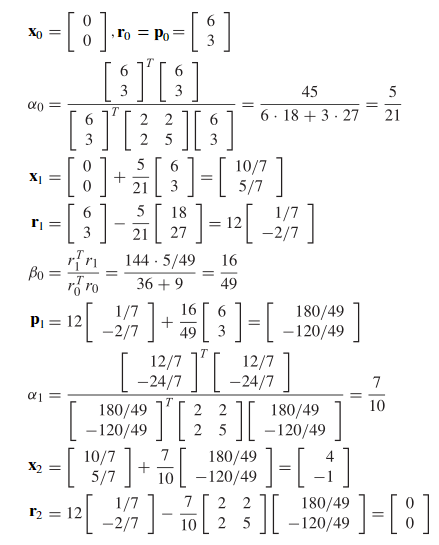 

Keďže $\mathbf{r}_2=\mathbf{b}-\mathbf{A}\mathbf{x}_2=\mathbf{0}$, tak riešenie je $\mathbf{x}_2=(4,-1)'$.

---

--- 

#### Poznámka 9

*  **Metódu CG je možné považovať za minimalizačnú metódu**, keďže aproximácia $\mathbf{x}_k$ riešenia $\mathbf{x}^*$ je definovaná takto: <br/>
<br/>
určiť $\mathbf{x}_k\in\mathbf{x}_0+\mathcal{K}_k(\mathbf{A},\mathbf{r}_0)$ spĺňajúce $\lVert\mathbf{x}_k-\mathbf{x}^*\rVert_{\mathbf{A}}\le\lVert\mathbf{x}-\mathbf{x}^*\rVert_{\mathbf{A}},\,\,\forall\mathbf{x}\in\mathbf{x}_0+\mathcal{K}_k(\mathbf{A},\mathbf{r}_0)$. 
<br/>
<br/>
Pri teoreticky presnej realizácii operácií výpočet skončí nájdením presného riešenia $\mathbf{x}_k=\mathbf{x}^*$ po najviac $n$ krokoch, t.j. pre $k\le n$. Skutočne, metóda združených gradientov je pre symetrickú, p.d. maticu ekvivalentná s metódou ortogonálnej projekcie, pre ktorú je toto tvrdenie uvedené vyššie. 


* Dá sa ukázať, že pre chybu $\mathbf{e}_k=\mathbf{x}_k-\mathbf{x}^*$ platí 
\begin{align*}\label{eq:ConjugGrad8} \tag{43}
\lVert\mathbf{e}_k\rVert_{\mathbf{A}}\le\left(\dfrac{\sqrt{\kappa_2(\mathbf{A})}-1}{\sqrt{\kappa_2(\mathbf{A})}+1}\right)^k\lVert\mathbf{e}_0\rVert_\mathbf{A},
\end{align*}
<br/>
kde $\kappa_2(\mathbf{A})$ je spektrálne číslo podmienenosti matice $\mathbf{A}$, t.j.
<br/>
<br/>
$$\kappa_2(\mathbf{A})=\lVert\mathbf{A}\rVert_{2}\cdot\lVert\mathbf{A}^{-1}\rVert_{2}=\lambda_{max}(\mathbf{A})/\lambda_{min}(\mathbf{A}),$$
<br/>
pričom $\lambda_{max}(\mathbf{A})$ resp. $\lambda_{min}(\mathbf{A})$ je najväčšie resp. najmenšie vlastné číslo matice $\mathbf{A}$. 


* **Na metódu CG sa dá pozerať tiež ako na projekčnú metódu**, kde matica $\mathbf{A}$ sústavy $\mathbf{A}\mathbf{x}=\mathbf{b}$ je symetrická, pozitívne definitná a $\mathcal{K}=\mathcal{L}=\mathcal{K}_m(\mathbf{r}_0,\mathbf{A})$. 


* Pohľad na metódu CG zdôrazňujúci iný aspekt tejto metódy je možné nájsť v [doplnkovom materiále](https://github.com/gajdosandrej/NUM_redukcia/blob/main/DoplnujuceMaterialy/LinearneSystemy2MetodaCG.pdf)

---

--- 

#### <font color=blue> Príklad 7 </font>  

In [2]:
# riesenie SLR pomocou CG resp. PCG 
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import cg
P = np.array([[4, 0, 1, 0],
              [0, 5, 0, 0],
              [1, 0, 3, 2],
              [0, 0, 2, 4]])
A = csc_matrix(P) # matica sustavy 
print('A = ')
print(A.toarray())
print('')
b = np.array([-1, -0.5, -1, 2]) # vektor pravych stran 
print('b = ') 
print(b) 
print() 
x, exit_code = cg(A, b) # riesenie SLR pomocou CG resp. PCG 
print('x = ') 
print(x)
print('')
print('Konvergencia: ') 
print(exit_code) # 0 indikuje uspesnu konvergenciu 
print('') 
print('Overenie numerickeho riesenia: ')
print(np.allclose(A.dot(x), b)) # overenie spravnosti/presnosti numerickeho riesenia 

A = 
[[4 0 1 0]
 [0 5 0 0]
 [1 0 3 2]
 [0 0 2 4]]

b = 
[-1.  -0.5 -1.   2. ]

x = 
[ 5.03611909e-17 -1.00000000e-01 -1.00000000e+00  1.00000000e+00]

Konvergencia: 
0

Overenie numerickeho riesenia: 
True


<font color=orange> SLR z Príkladu 6 vyriešte v Python-e pomocou metódy CG. </font> 

--- 

#### <ins> Podmienenie </ins>

Technika na urýchlenie konvergencie metódy CG. Miesto úlohy $\mathbf{A}\mathbf{x}=\mathbf{b}$ sa rieší úloha $\mathbf{P}^{-1}\mathbf{A}\left(\mathbf{P}^{-1}\right)'\mathbf{P}'\mathbf{x}=\mathbf{P}^{-1}\mathbf{b}$, t.j. úloha 

\begin{align*}\label{eq:ConjugGrad9} \tag{44}
\tilde{\mathbf{A}}\tilde{\mathbf{x}}=\tilde{\mathbf{b}}, \quad \text{kde} \quad \tilde{\mathbf{A}}=\mathbf{P}^{-1}\mathbf{A}\left(\mathbf{P}^{-1}\right)',\,\, \tilde{\mathbf{b}}=\mathbf{P}^{-1}\mathbf{b},\,\,\tilde{\mathbf{x}}=\mathbf{P}'\mathbf{x},
\end{align*}

pričom matica $\mathbf{P}$ sa volí tak, aby číso podmienenosi $\kappa_2(\tilde{\mathbf{A}})$ bolo pokiaľ možno výrazne menšie než číslo podmienenosti $\kappa_2(\mathbf{A})$. 

**_Algoritmus PCG_** (preconditioned conjugate gradient) dostaneme z algoritmu CG tak, že v ňom nahradíme všetky neskalárne premenné vlnkou a potom za tieto premenné podľa \eqref{eq:ConjugGrad9} dosadíme $\tilde{\mathbf{A}}=\mathbf{P}^{-1}\mathbf{A}\left(\mathbf{P}^{-1}\right)',\,\, \tilde{\mathbf{b}}=\mathbf{P}^{-1}\mathbf{b},\,\,\tilde{\mathbf{x}}_k=\mathbf{P}'\mathbf{x}_k,\,\,\tilde{\mathbf{r}}_k=\tilde{\mathbf{b}}-\tilde{\mathbf{A}}\tilde{\mathbf{x}}_k=\left(\mathbf{P}^{-1}\right)'\mathbf{r}_k,\,\,\tilde{\mathbf{p}}_k=\mathbf{P}'\mathbf{p}_k$. Pomocou podmieňovacej matice 

\begin{align*}\label{eq:ConjugGrad10} \tag{45}
\mathbf{M}=\mathbf{P}\mathbf{P}'
\end{align*}

po úprave dostaneme 

---

<b> <ins> Algoritmus PCG </ins> </b> (Preconditioned conjugate gradient)

**Krok 1** 

Vstup: $\mathbf{A}$, $\mathbf{b}$, $\mathbf{x}_0$, $\varepsilon$; 

**Krok 2**

$\mathbf{r}_0:=\mathbf{b}-\mathbf{A}\mathbf{x}_0$; $\mathbf{z}_0:=\mathbf{M}^{-1}\mathbf{r}_0$; $\mathbf{p}_0=\mathbf{r}_0$; 

**Krok 3** 

Až do splnenia kritéria konvergencie postupne pre $k=0,1,2,\ldots$ opakuj: 

* $\alpha_k:=(\mathbf{r}_k,\mathbf{z}_k)/(\mathbf{A}\mathbf{p}_k,\mathbf{p}_k)$; 

* $\mathbf{x}_{k+1}:=\mathbf{x}_k+\alpha_k\mathbf{p}_k$; 
    
* $\mathbf{r}_{k+1}:=\mathbf{r}_k-\alpha_k\mathbf{A}\mathbf{p}_k$; 

* $\mathbf{z}_{k+1}:=\mathbf{M}^{-1}\mathbf{r}_{k+1}$; 

* $\beta_k:=(\mathbf{r}_{k+1},\mathbf{z}_{k+1})/(\mathbf{r}_k,\mathbf{z}_k)$

* $\mathbf{p}_{k+1}:=\mathbf{z}_{k+1}+\beta_k\mathbf{p}_k$

**Krok 4** 

Výstup: $\mathbf{x}_{k+1}$.   

---

Vektory $\mathbf{z}_k=\mathbf{M}^{-1}\mathbf{r}_k$, $k=0,1,\ldots$ získame riešením rovníc $\mathbf{M}\mathbf{z}_k=\mathbf{r}_k$. 

**Vlastnosti PCG metódy:**

1. Vektory $\mathbf{r}_0,\mathbf{r}_1,\ldots,\mathbf{r}_k$ sú navzájom $\mathbf{M}^{-1}$-ortogonálne, t.j. platí $\left(\mathbf{r}_i,\mathbf{M}^{-1}\mathbf{r}_j\right)=0$ pre $i\neq j$. Vektory $\mathbf{r}_i$, $\mathbf{r}_j$ sú teda združené vzhľadom k matici $\mathbf{M}^{-1}$. 


2. Vektory $\mathbf{p}_0,\mathbf{p}_1,\ldots,\mathbf{p}_k$ sú navzájom $\mathbf{A}$-ortogonálne, t.j. platí $\left(\mathbf{p}_i,\mathbf{A}\mathbf{p}_j\right)=0$ pre $i\neq j$. Vektory $\mathbf{p}_i$, $\mathbf{p}_j$ sú teda združené vzhľadom k matici $\mathbf{M}^{-1}$.


3. Metódu PCG je možné považovať za minimalizačnú metódu, keďže približné riešenie $\mathbf{x}_k$ minimalizuje $\lVert\mathbf{x}-\mathbf{x}^*\rVert_{\mathbf{A}}$ na množine $\mathbf{x}_0+\mathcal{K}_k(\mathbf{K},\mathbf{z}_0)$, kde <br/>
<br/>
$$\mathbf{K}=\mathbf{M}^{-1}\mathbf{A}, \quad \mathbf{z}_0=\mathbf{M}^{-1}\mathbf{r}_0, \quad \mathcal{K}_k(\mathbf{K},\mathbf{z}_0)=[\mathbf{z}_0,\mathbf{K}\mathbf{z}_0,\ldots,\mathbf{K}^{k-1}\mathbf{z}_0].$$ 
<br/>
<br/>
Pri teoreticky presnej realizácii operácií výpočet skončí nájdením presného riešenia $\mathbf{x}_k=\mathbf{x}^*$ po najviac $n$ krokoch, t.j. pre $k\le n$. 


4. Pre chybu $\mathbf{e}_k=\mathbf{x}_k-\mathbf{x}^*$ platí 
\begin{align*}
\lVert\mathbf{e}_k\rVert_{\mathbf{K}}\le2\left(\dfrac{\sqrt{\kappa_2(\mathbf{K})}-1}{\sqrt{\kappa_2(\mathbf{A})}+1}\right)^k\lVert\mathbf{e}_0\rVert_\mathbf{A},
\end{align*}
<br/>
kde $\kappa_2(\mathbf{K})$ je spektrálne číslo podmienenosti matice $\mathbf{K}$, t.j.
<br/>
<br/>
$$\kappa_2(\mathbf{K})=\lVert\mathbf{K}\rVert_{2}\cdot\lVert\mathbf{K}^2\rVert_{2}=\lambda_{max}(\mathbf{K})/\lambda_{min}(\mathbf{K}),$$
<br/>
pričom $\lambda_{max}(\mathbf{K})$ resp. $\lambda_{min}(\mathbf{K})$ je najväčšie resp. najmenšie vlastné číslo matice $\mathbf{K}$. 
<br/>
<br/>
Vhodnou voľbou predpodmieňovacej matice $\mathbf{M}$ je možné číslo podmienenosti matice $\mathbf{K}$ zmenšiť (vzhľadom k číslu nepredpodmienenej matice $\mathbf{K}=\mathbf{A}$) a tým urýchliť konvergenciu PCG metódy oproti metóde CG. 


5. V Python-e je táto metóda implementovaná ako funkcia `scipy.sparse.linalg.cg()`. 

#### Voľba podmieňovacej matice 

V odbornej literatúre je možné nájsť veľa rôznych vhodných predpodmieňovacích matíc. Majú však spoločné tieto vlastnosti: 

a) $\mathbf{M}$ je pozitívne definitná matica; 

b) $\mathbf{M}$ je dobrá aproximácia $\mathbf{A}$; 

c) zostavenie matice $\mathbf{M}$ nevyžaduje veľký objem výpočtov; 

d) riešenie sústav rovníc $\mathbf{M}\mathbf{z}_k=\mathbf{r}_k$ nevyžaduje veľký objem výpočtov. 

Ďalej uvedieme tri spôsoby ako je možné maticu $\mathbf{M}$ vybrať. 

1. Ak zvolíme $\mathbf{M}=\mathbf{D}$, kde $\mathbf{D}=\mathrm{diag}\{a_{11},a_{22},\ldots,a_{nn}\}$, tak dostávame zrýchlenie Jacobiho metódy. Táto voľba však nie je príliš vhodná resp. kvalitná lebo $\mathbf{M}$ nie je dostatočne dobrou aproximáciou matice $\mathbf{A}$. 


2. Lepšou voľbou je matica 
$$\mathbf{M}=\dfrac{1}{\omega(2-\omega)}(\mathbf{D}+\omega\mathbf{L})\mathbf{D}^{-1}(\mathbf{D}+\omega\mathbf{L})',$$ 
<br/>
ktorá bola predstavená pri popise SSOR metódy v predchádzajúcej časti učebného textu. Riešenie $\mathbf{z}_k$ SLR $\mathbf{M}\mathbf{z}_k=\mathbf{r}_k$ dostaneme riešením dvoch SLR 
<br/>
<br/>
$$(\mathbf{D}+\omega\mathbf{L})\mathbf{y}=\mathbf{r}_k, \quad (\mathbf{D}+\omega\mathbf{L})'\mathbf{z}_k=\omega(2-\omega)\mathbf{D}\mathbf{y}$$
<br/>
s dolnou trojuholníkovou maticou $\mathbf{D}+\omega\mathbf{L}$ a hornou trojuholníkovou maticou $(\mathbf{D}+\omega\mathbf{L})'$.


3. Volíme $\mathbf{M}=\mathbf{L}\mathbf{L}'$, kde $\mathbf{L}$ je dolná trojuholníková matica získaná tzv. *neúplným Choleskeho rozkladom* matice $\mathbf{A}$ (takéto metódy sa označujú skratkou IC z anglického *incomplete Cholesky*). Algoritmus označovaný ako IC(0) (ang. *incomplete Cholesky with zero-fill*) postupuje rovnako ako štandardný Choleskeho rozklad s tým rozdielom, že pre $a_{ij}=0$ sa položí $l_{ij}=0$. 

---

<b> <ins> Algoritmus IC(0) </ins> </b> 

**Krok 1** 

Vstup: $\mathbf{A}$; 

**Krok 2**

Pre $k=1,2,\ldots,n$ postupne vypočítaj: 

* $l_{kk}:=\left(a_{kk}-\displaystyle\sum\limits_{j=1}^{k-1}l_{kj}^2\right)^{1/2}$;


* $\begin{cases}l_{ik}=\dfrac{1}{l_{kk}}\left(a_{ik}-\displaystyle\sum\limits_{j=1}^{k-1}l_{ij}l_{kj}\right), \quad \text{pre } a_{ik}\neq0 \\ \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad i=k+1,k+2,\ldots.n. \\ 0 \qquad\qquad\qquad\qquad\qquad\quad \text{pre } a_{ik}=0,\end{cases}$

**Krok 3** 

Výstup: $\mathbf{L}$.   

---

--- 

#### Poznámka 10

Algoritmus IC(0) môže zlyhať, keď $a_{kk}-\displaystyle\sum\limits_{j=1}^{k-1}l_{kj}^2\le0$. Táto situácia nenastane napr. vtedy, keď matica $\mathbf{A}$ je rýdzo diagonálne dominantná alebo keď sú mimodiagonálne prvky matice $\mathbf{A}$ nekladné. Nižšie uvedený algoritmus IC-MJ podľa Jenningsa a Malika nezlyhá pre žiadnu p.d. maticu. 

---

---

<b> <ins> Algoritmus IC-MJ </ins> </b> 

**Krok 1** 

Vstup: $\mathbf{A}$; 

**Krok 2**

$n:=$ počet riadkov/stĺpcov matice $\mathbf{A}$; 

**Krok 3**
 
Postupne pre $k=1,2,\ldots,n$ opakuj: 

* $d_k:=a_{kk}$

**Krok 4**

Postupne pre $k=1,2,\ldots,n$ opakuj: 

* $d_{k}:=d_k-\displaystyle\sum\limits_{j=1}^{k-1}l_{kj}^2$;  

* postupne pre $i=k+1,k+2,\ldots,n$ opakuj: 

    * $l_{ik}:=a_{ik}-\displaystyle\sum\limits_{j=1}^{k-1}l_{ij}l_{kj}$; 
    
    * ak $a_{ik}=0$: $d_k:=d_k+|l_{ik}|$; $d_i:=d_i+|l_{ik}|$; $l_{ik}:=0$; 
    
* $l_{kk}:=\sqrt{d_k}$; 

* postupne pre $i=k+1,k+2,\ldots,n$ opakuj: 

    * $l_{ik}:=l_{ik}/l_{kk}$;

**Krok 5** 

Výstup: $\mathbf{L}$.   

---

--- 

#### Poznámka 11

Pokiaľ v kroku 4 v bode 4 vynecháme príkazy $d_k:=d_k+|l_{ik}|$, $d_i:=d_i+|l_{ik}|$, dostaneme algoritmus IC(0). Ďalšie algoritmy založené na princípe neúplného Choleskeho rozkladu sa dajú nájsť v odbornej literatúre. Riešenie sústavy rovníc $\mathbf{L}\mathbf{L}'\mathbf{z}_k=\mathbf{r}_k$ je jednoduché: najprv sa určí $\mathbf{y}$ ako riešenie sústavy $\mathbf{L}\mathbf{y}=\mathbf{r}_k$ a následne sa vypočíta $\mathbf{z}_k$ ako riešenie sústavy $\mathbf{L}'\mathbf{z}_k=\mathbf{y}$. V Python-e je neúplný Choleskeho rozklad implementovaný napr. v balíku *[ilupp](https://ilupp.readthedocs.io/en/latest/)*. 

---

<font color=purple> EXTRA: Porovnajte rýchlosť (konvergencie) CG a PCG pomocou vstavaných funkcií v Python-e (skúste odmerať časy  rádovo na stovkách či tisícoch vyriešených SLR - na generovanie symetrických p.d. matíc sústav môžete využiť funkciu z témy 6 z Poznámky 5). Pri PCG vytvorte podmieňovaciu maticu podľa vzťahu $(45)$ a môžete tiež využiť nasledujúci kód: </font> 

In [13]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('A = ') 
print(A) 
print('==============')
L = np.tril(A, 0)
print('L = ')
print(L) 
print('==============')
D = np.diag(np.diag(A)) 
print('D = ')
print(D)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
L = 
[[1 0 0]
 [4 5 0]
 [7 8 9]]
D = 
[[1 0 0]
 [0 5 0]
 [0 0 9]]


--- 

#### Poznámka 12

V prípade predimenzovaných (viac rovníc ako premenných) i poddimenzovaných (menej rovníc ako premenných) systémov lineárnych rovníc je možné častokrát využiť na ich riešenie napr. metódu najmenších štvorcov, prípadne jej modifikácie či iné špecializované algoritmy. To platí aj pre systémy so singulárnou maticou sústavy. 

---

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 